 

<font size="5"> **Introdução a Modelos Dinâmicos  -  LCD** </font>

 <font size="5"> **Semana 4 - Aulas P7 e P8** </font> 
 
 
<font size="5"> Projeto: Regressão linear </font>
   
 
   <font size="4"> Diana Aldea Mendes </font>
 
  <font size="3"> diana.mendes@iscte-iul.pt  </font> 
  
   
  <font size="3">ISCTE-IUL, Março de 2024 </font> 
  
 

In [1]:
library(car) # para bases de dados e gráficos
library(lmtest) # para testes de hipótese sobre os pressupostos dos resíduos
library(olsrr) # para regressão (e testes de hipótese)
library(tseries) # teste de Jarque-Bera
library(ggplot2) # gráficos
library(tidyr) # data-frames
library(MASS) # estatística, bases de dados, regressão


Warning message:
"package 'car' was built under R version 4.3.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.3.3"
Warning message:
"package 'lmtest' was built under R version 4.3.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.3.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'olsrr' was built under R version 4.3.3"

Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers


Warning message:
"package 'tseries' was built under R version 4.3.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'ggplot2' was built under R version 4.3.3"

Attaching package: 'MASS'


The following object is masked from 'package:olsrr':

    cement




## Pré-processamento e análise de dados

**Descrição da base de dados** - Prices of Personal Computers Dataset Description

*price*
- price in US dollars of 486 PCs

*speed*
- clock speed in MHz

*hd*
- size of hard drive in MB

*ram*
- size of Ram in in MB

*screen*
- size of screen in inches

*cd*
- is a CD-ROM present ?

*multi*
- is a multimedia kit (speakers, sound card) included ?

*premium*
- is the manufacturer was a "premium" firm (IBM, COMPAQ) ?

*ads*
- number of 486 price listings for each month

*trend*
- time trend indicating month starting from January of 1993 to November of 1995.

In [2]:
# importar os dados (ficheiro txt)
comp <- read.csv("Computers1995.txt", header = TRUE)


In [3]:
# visualizar as primeiras linhas do data.frame
head(comp)


,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
6,3695,66,340,16,14,no,no,yes,94,1


In [4]:
# estrutura dos dados
str(comp)


'data.frame':	6259 obs. of  10 variables:
 $ price  : int  1499 1795 1595 1849 3295 3695 1720 1995 2225 2575 ...
 $ speed  : int  25 33 25 25 33 66 25 50 50 50 ...
 $ hd     : int  80 85 170 170 340 340 170 85 210 210 ...
 $ ram    : int  4 2 4 8 16 16 4 2 NA 4 ...
 $ screen : int  14 14 15 14 14 14 14 14 14 15 ...
 $ cd     : chr  "  no  " "  no  " "  no  " "  no  " ...
 $ multi  : chr  "  no  " "  no  " "  no  " "  no  " ...
 $ premium: chr  "  yes  " "  yes  " "  yes  " "  no  " ...
 $ ads    : int  94 94 94 94 94 94 94 94 94 94 ...
 $ trend  : num  1 1 1 1 1 1 1 1 1 1 ...


In [5]:
# temos 10 variáveis
# cada variável tem 6259 observações
# observam-se NA's o que indique missing data
# temos 3 variáveis categóricas (Factor)

In [6]:
# usamos o comando "summary" para ver quantas observações faltam em cada uma das variáveis
summary(comp)

     price          speed              hd              ram        
 Min.   : 949   Min.   : 25.00   Min.   :  80.0   Min.   : 2.000  
 1st Qu.:1794   1st Qu.: 33.00   1st Qu.: 214.0   1st Qu.: 4.000  
 Median :2144   Median : 50.00   Median : 340.0   Median : 8.000  
 Mean   :2219   Mean   : 52.12   Mean   : 416.7   Mean   : 8.289  
 3rd Qu.:2595   3rd Qu.: 66.00   3rd Qu.: 528.0   3rd Qu.: 8.000  
 Max.   :5399   Max.   :666.00   Max.   :2100.0   Max.   :32.000  
 NA's   :4      NA's   :10       NA's   :3        NA's   :4       
     screen           cd               multi             premium         
 Min.   :14.00   Length:6259        Length:6259        Length:6259       
 1st Qu.:14.00   Class :character   Class :character   Class :character  
 Median :14.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :14.61                                                           
 3rd Qu.:15.00                                                           
 Max.   :17.00      

In [7]:
# na última linha de cada grupo, temos os NA's (missing data)
# por exemplo a variável price tem 4 NA's
# a variável speed tem 10 NA's
# é interessante observar o valor máximo e o valor mínimo de cada variável, pois podem indicar
# existência de valores extremos/outlier (valores muito diferentes da média)
# por exemplo, na variévl speed, temos o valor máximo = 666, enquanto que a média é 52.12
# claramente trata-se de um outlier (que pode ser eliminado da base de dados)

In [8]:
# eliminamos todas as linhas que tem pelo menos um NA's e denotamos
# o novo data-frame por "comp_n"

comp_n <- na.omit(comp)

# ou, usando a função "drop_na" de library(tidyr)
# comp_n <- drop_na(comp)


In [9]:
# vejamos o sumário do novo data.frame comp_n (já com os NA´s eliminados)
summary(comp_n)

     price          speed              hd            ram            screen     
 Min.   : 949   Min.   : 25.00   Min.   :  80   Min.   : 2.00   Min.   :14.00  
 1st Qu.:1794   1st Qu.: 33.00   1st Qu.: 214   1st Qu.: 4.00   1st Qu.:14.00  
 Median :2144   Median : 50.00   Median : 340   Median : 8.00   Median :14.00  
 Mean   :2219   Mean   : 52.13   Mean   : 417   Mean   : 8.29   Mean   :14.61  
 3rd Qu.:2595   3rd Qu.: 66.00   3rd Qu.: 528   3rd Qu.: 8.00   3rd Qu.:15.00  
 Max.   :5399   Max.   :666.00   Max.   :2100   Max.   :32.00   Max.   :17.00  
      cd               multi             premium               ads       
 Length:6239        Length:6239        Length:6239        Min.   : 39.0  
 Class :character   Class :character   Class :character   1st Qu.:163.0  
 Mode  :character   Mode  :character   Mode  :character   Median :246.0  
                                                          Mean   :221.6  
                                                          3rd Qu.:275.

In [10]:
# já não existem NA's
# vamos ver quantas linhas tem comp e comp_n
nrow(comp) # nr linhas data-frame inicial
nrow(comp_n) # nr linhas data-frame sem NA's
nrow(comp) - nrow(comp_n) # nr de NA's eliminados


[1] 6259

[1] 6239

[1] 20

In [11]:
# portanto eliminamos, em total, 20 NA's da base de dados

In [12]:
# eliminamos as variáveis não-numéricas (para estudar correlação linear)
comp_nn <- comp_n[, -c(6, 7, 8)]
head(comp_nn)


,price,speed,hd,ram,screen,ads,trend
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1499,25,80,4,14,94,1
2,1795,33,85,2,14,94,1
3,1595,25,170,4,15,94,1
4,1849,25,170,8,14,94,1
5,3295,33,340,16,14,94,1
6,3695,66,340,16,14,94,1


In [13]:
# matrix de correlação (Pearson)
cor(comp_nn)


,price,speed,hd,ram,screen,ads,trend
price,1.00000000,0.2857013,0.4304317,0.6231373,0.2968965,0.05613961,-0.2004985
speed,0.28570127,1.0000000,0.3532554,0.2249705,0.1730224,-0.20343526,0.3802752
hd,0.43043171,0.3532554,1.0000000,0.7775107,0.2328999,-0.32715762,0.5773266
ram,0.62313732,0.2249705,0.7775107,1.0000000,0.2097443,-0.18363168,0.2761807
screen,0.29689652,0.1730224,0.2328999,0.2097443,1.0000000,-0.09419400,0.1880145
ads,0.05613961,-0.2034353,-0.3271576,-0.1836317,-0.0941940,1.00000000,-0.3275620
trend,-0.20049852,0.3802752,0.5773266,0.2761807,0.1880145,-0.32756201,1.0000000


In [14]:
# observa-se que é a variável ram que tem a maior correlação com o preço dos computadores
# a variável ads não está praticamente correlacionada com a variável price
# price e trend tem correlação negativa (média-baixa)


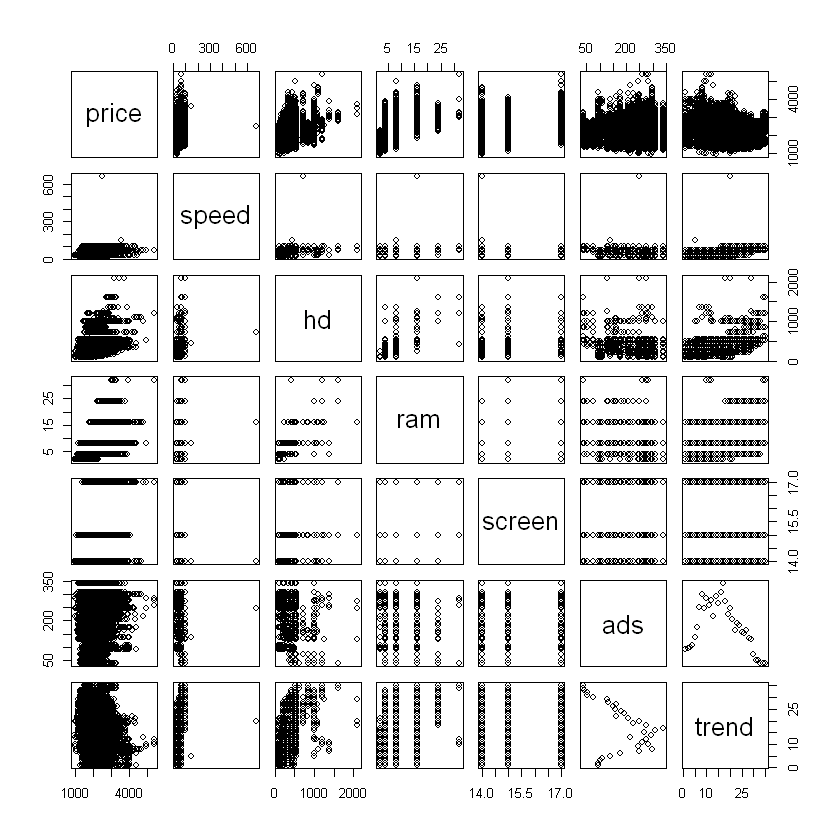

In [15]:
# representação gráfica (diagramas de dispersão) de pares de variáveis
pairs(comp_nn)


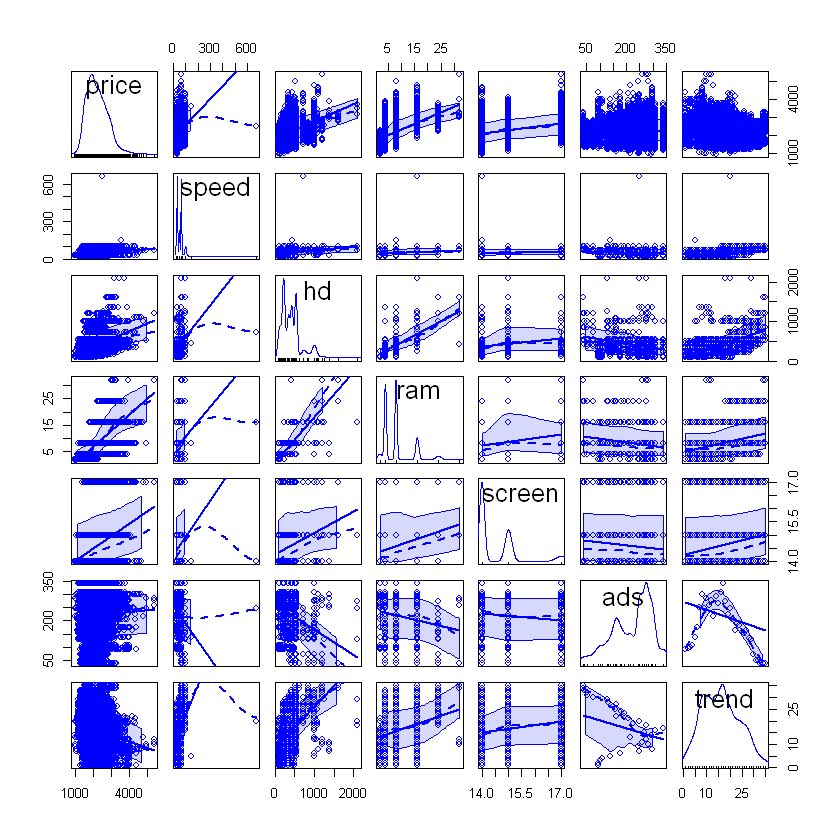

In [16]:
scatterplotMatrix(comp_nn)
# a variável price é assimétrica
# existem padrões lineares e não-lineares entre as variáveis
# existem vários pontos extremos / outliers


## Modelos de regressão linear múltipla

In [ ]:
# começamos por escolher o melhor modelo de forma automática usando a biblioteca olsrr

    # ols_step_both_p(fit)
    # ols_step_both_aic(fit)

# de forma equivalente podem usar a função stepAIC com direction=backward (da bibliotec MASS)

    # stepAIC(fit, direction="backward")

In [18]:
comp0 <- comp_n
head(comp0)


,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
6,3695,66,340,16,14,no,no,yes,94,1


In [19]:
# escolha do modelo de regressão que melhor se ajusta aos dados com base no p-value
fit <- lm(price ~ ., data = comp0)
ols_step_both_p(fit)




                                 Stepwise Summary                                 
--------------------------------------------------------------------------------
Step    Variable          AIC          SBC         SBIC         R2       Adj. R2 
--------------------------------------------------------------------------------
 0      Base Model     97115.341    97128.818    79407.136    0.00000    0.00000 
 1      ram (+)        94050.788    94071.004    76342.074    0.38830    0.38820 
 2      trend (+)      92293.641    92320.595    74584.737    0.53859    0.53844 
 3      speed (+)      90953.772    90987.465    73245.092    0.62788    0.62771 
 4      premium (+)    89940.203    89980.634    72232.061    0.68378    0.68358 
 5      screen (+)     89164.626    89211.797    71457.259    0.72084    0.72061 
 6      hd (+)         88520.690    88574.599    70814.357    0.74829    0.74805 
 7      ads (+)        88341.548    88402.196    70635.549    0.75550    0.75522 
 8      multi (

In [20]:
# # escolha do modelo de regressão que melhor se ajusta aos dados com base no AIC
fit <- lm(price ~ ., data = comp0)
ols_step_both_aic(fit)




                                 Stepwise Summary                                 
--------------------------------------------------------------------------------
Step    Variable          AIC          SBC         SBIC         R2       Adj. R2 
--------------------------------------------------------------------------------
 0      Base Model     97115.341    97128.818    79407.136    0.00000    0.00000 
 1      ram (+)        94050.788    94071.004    76342.074    0.38830    0.38820 
 2      trend (+)      92293.641    92320.595    74584.737    0.53859    0.53844 
 3      speed (+)      90953.772    90987.465    73245.092    0.62788    0.62771 
 4      premium (+)    89940.203    89980.634    72232.061    0.68378    0.68358 
 5      screen (+)     89164.626    89211.797    71457.259    0.72084    0.72061 
 6      hd (+)         88520.690    88574.599    70814.357    0.74829    0.74805 
 7      ads (+)        88341.548    88402.196    70635.549    0.75550    0.75522 
 8      multi (

In [123]:
# temos concordância pelos dois métodos, portanto vamos usar o
# modelo (completo) com todas as variáveis

fit <- lm(price ~ ., data = comp0)
summary(fit)


# experiências da "professora":
# fit66 <- lm(log(price) ~ speed + log(hd) + screen + ram + premium + multi + cd + ads + trend, data = comp0)

# summary(fit66)



Call:
lm(formula = price ~ ., data = comp0)

Residuals:
    Min      1Q  Median      3Q     Max 
-4926.9  -173.4   -12.1   147.1  2017.6 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     303.14399   62.07084   4.884 1.07e-06 ***
speed             7.96328    0.17569  45.327  < 2e-16 ***
hd                0.79694    0.02835  28.113  < 2e-16 ***
ram              47.96887    1.09566  43.781  < 2e-16 ***
screen          126.99772    4.10660  30.925  < 2e-16 ***
cd  yes          63.04262    9.76869   6.454 1.17e-10 ***
multi  yes      104.72959   11.71544   8.939  < 2e-16 ***
premium  yes   -503.94321   12.66616 -39.787  < 2e-16 ***
ads               0.62432    0.05300  11.780  < 2e-16 ***
trend           -50.90164    0.64639 -78.748  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 282.6 on 6229 degrees of freedom
Multiple R-squared:  0.7633,	Adjusted R-squared:  0.7629 
F-statistic:  2231 on 9 

In [22]:
# todas as variáveis são estatísticamente significativas
# R^2 tem um valor elevado
# os erros residuais são bastante elevados
# o modelo é adequado globalmente pela estatística F


[1] -3.013828e-18


	studentized Breusch-Pagan test

data:  fit66
BP = 790.96, df = 9, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit66
LM test = 0.71774, df = 1, p-value = 0.3969



	Jarque Bera Test

data:  fit66$residuals
X-squared = 77494, df = 2, p-value < 2.2e-16


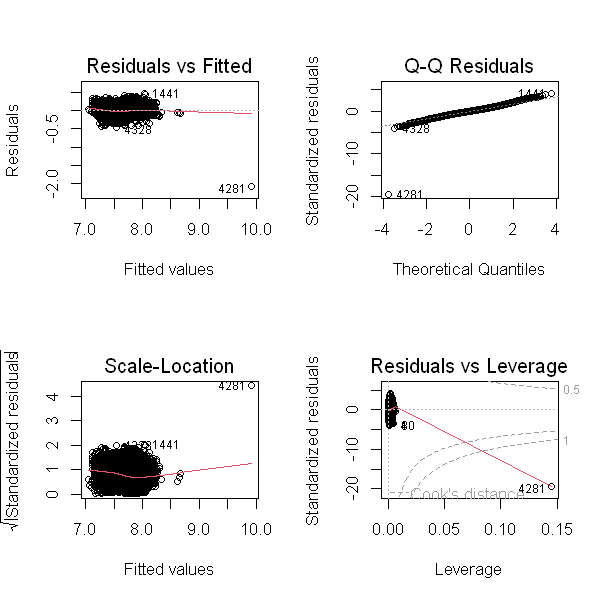

In [23]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit66$residuals) # média nula
bptest(fit66) # variância constante
bgtest(fit66) # ausência de correlação
jarque.bera.test(fit66$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit66)


In [24]:
# verificamos se existe multicolinearidade entre as variáveis independentes (VIF >5)
vif(fit)


speed       hd      ram   screen       cd    multi  premium      ads 
1.227358 4.195622 2.972180 1.078939 1.854826 1.290274 1.108711 1.222791 
   trend 
2.011552

In [25]:
# não existem variáveis multicolineares
# a média é nula: verificado
# variância constante: não se verifique
# ausência de correlação: verificado
# normalidade: não se verifique
# evidências claras de existência de outliers influenciadores (na posição 4281)


In [26]:
# vamos tentar corrigir a heterocedasticidade e a não-normalidade (optativo) dos resíduos
# # verificamos se existem outliers que influênciam o modelo de regressão "fit"


In [27]:
# vamos fazer um teste de outlier para o modelo "fit"
outlierTest(fit, data = comp0)


        rstudent unadjusted p-value Bonferroni p
 4281 -19.396087         2.0208e-81   1.2608e-77
 1441   7.176125         8.0050e-13   4.9943e-09
 1701   7.050616         1.9738e-12   1.2314e-08
 20     5.469912         4.6779e-08   2.9185e-04
 28     4.980259         6.5210e-07   4.0684e-03
 310    4.779357         1.7989e-06   1.1224e-02
 314    4.653318         3.3339e-06   2.0801e-02
 208    4.616391         3.9831e-06   2.4850e-02
 291    4.556131         5.3098e-06   3.3128e-02
 224    4.490405         7.2370e-06   4.5152e-02

In [28]:
# temos uma lista de outliers, vamos analisar se os podemos eliminar ou não da base de dados


In [29]:
# na lista dos outliers, tentamos entender se os valores são possíveis (situações extremas)
# ou se são realmente erros (procuramos e justificamos as anomalias nas variáveis)

comp[c(20, 28, 208, 224, 291, 310, 314, 1701, 1441, 4281), ]


,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
20,4395,66,452,8,14,no,no,yes,94,1
28,3995,33,452,8,14,no,no,yes,94,1
208,3795,33,452,8,14,no,no,yes,100,3
224,3895,50,452,8,14,no,no,yes,100,3
291,3995,66,452,8,14,no,no,yes,108,4
310,3795,33,452,8,14,no,no,yes,108,4
314,3895,50,452,8,14,no,no,yes,108,4
1701,4999,66,525,8,17,yes,no,yes,283,10
1441,4999,66,525,8,17,no,no,yes,246,9


In [30]:
# o outlier na posição "4281" parece ser um erro de inserção, pois a velocidade (speed)
# é demasiado elevada (deve ser no máx 66)

# os restantes outliers parecem valores reais (apenas preços mais altos,
# que eventualmente podem ser justificados pelas características das outras variáveis )


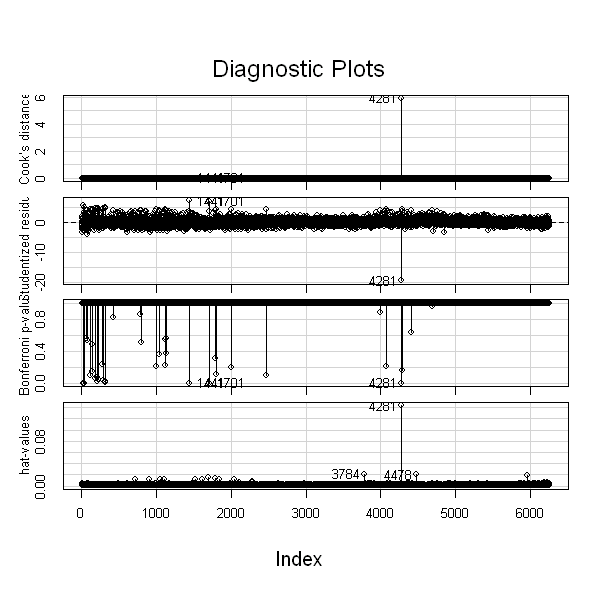

In [31]:
# vamos ver se existem elementos extremos influenciadores
influenceIndexPlot(fit, id = list(n = 3))


In [32]:
# distância de Cook
cooksd <- cooks.distance(fit)

# detetar se existem influenciadores
influential <- as.numeric(names(cooksd)[(cooksd > 4 * mean(cooksd, na.rm = T))])

# visualizar os influenciadores
head(comp0[influential, ])


,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
22,2795,66,130,4,14,no,no,yes,94,1
32,1995,25,130,4,14,no,no,yes,94,1
75,2999,50,170,4,14,no,no,yes,94,1
84,2720,33,250,8,15,yes,no,yes,94,1
152,2225,33,250,8,15,no,no,yes,95,2
285,2545,66,250,8,15,no,no,yes,100,3


In [33]:
# existem vários elementos que se destacam
which.max(comp0$speed)

comp0[4263, ]


[1] 4263

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
4281,2495,666,720,16,14,yes,no,yes,248,20


In [34]:
# eliminar os outliers (da variável speed) e denotar o novo data-frame por comp1

outliers_speed <- boxplot(comp0$speed, plot = FALSE)$out
comp0[which(comp0$speed %in% outliers_speed), ]
comp1 <- comp0[-which(comp0$speed %in% outliers_speed), ]


,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
492,3595,150,452,8,14,no,no,yes,139,5
4281,2495,666,720,16,14,yes,no,yes,248,20


In [35]:
# estimar um novo modelo de regressão linear múltipla para a base de dados sem outliers (comp1)

fit1 <- lm(price ~ ., data = comp1)

summary(fit1)



Call:
lm(formula = price ~ ., data = comp1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1093.81  -173.66   -11.46   146.86  2002.30 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     307.40367   60.29084   5.099 3.52e-07 ***
speed             9.30890    0.18476  50.384  < 2e-16 ***
hd                0.77789    0.02755  28.235  < 2e-16 ***
ram              48.31506    1.06432  45.395  < 2e-16 ***
screen          123.14181    3.99391  30.832  < 2e-16 ***
cd  yes          61.63078    9.48844   6.495 8.92e-11 ***
multi  yes      103.77718   11.37871   9.120  < 2e-16 ***
premium  yes   -508.98393   12.30476 -41.365  < 2e-16 ***
ads               0.65663    0.05150  12.749  < 2e-16 ***
trend           -51.77391    0.62989 -82.195  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 274.5 on 6227 degrees of freedom
Multiple R-squared:  0.7765,	Adjusted R-squared:  0.7762 
F-statistic:  

[1] 7.119648e-15


	studentized Breusch-Pagan test

data:  fit1
BP = 477.88, df = 9, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit1
LM test = 6.4797, df = 1, p-value = 0.01091



	Jarque Bera Test

data:  fit1$residuals
X-squared = 3063.1, df = 2, p-value < 2.2e-16


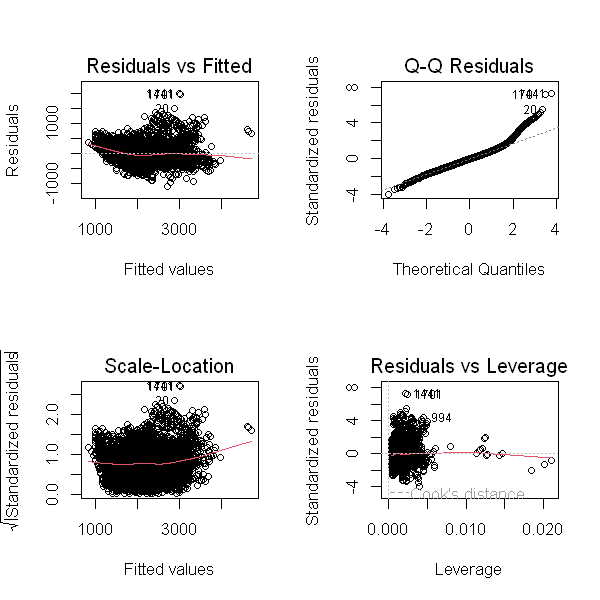

In [36]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit1$residuals) # média nula
bptest(fit1) # variância constante
bgtest(fit1) # ausência de correlação
jarque.bera.test(fit1$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit1)


In [37]:
# ainda parece termos alguns outliers (que estão a enviesar os resultados)
# comparar os dois modelos pelo AIC
AIC(fit, fit1)


Warning message in AIC.default(fit, fit1):
"models are not all fitted to the same number of observations"


,df,AIC
,<dbl>,<dbl>
fit,11,88144.33
fit1,11,87752.12


In [38]:
# o segundo modelo parece ser ligeiramente melhor, pois tem o AIC e o erro padrão menor
# e o R^2 e o R^2 ajustado maior


In [39]:
# vamos fazer um teste de outlier para o modelo "fit1"
outlierTest(fit1, data = comp1)


      rstudent unadjusted p-value Bonferroni p
 1441 7.333785         2.5221e-13   1.5730e-09
 1701 7.208496         6.3274e-13   3.9464e-09
 20   5.521200         3.5029e-08   2.1848e-04
 28   5.179866         2.2902e-07   1.4284e-03
 310  4.980846         6.5014e-07   4.0549e-03
 208  4.810731         1.5392e-06   9.6001e-03
 314  4.767136         1.9111e-06   1.1920e-02
 175  4.633398         3.6704e-06   2.2892e-02
 224  4.597106         4.3686e-06   2.7247e-02
 291  4.588208         4.5583e-06   2.8430e-02

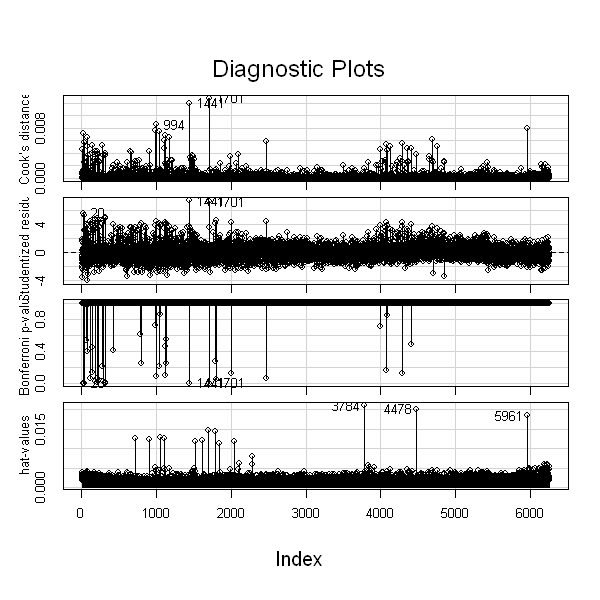

In [40]:
# vamos ver se existem elementos extremos influenciadores
influenceIndexPlot(fit1, id = list(n = 3))


In [41]:
# parece que, de facto, existem preços com valores deslocados (maiores que a média)


In [42]:
# eliminar os outliers (da variável price) e denotar o novo data-frame por comp2
outliers_price <- boxplot(comp1$price, plot = FALSE)$out
comp1[which(comp1$price %in% outliers_price), ]
comp2 <- comp1[-which(comp1$price %in% outliers_price), ]


,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
20,4395,66,452,8,14,no,no,yes,94,1
28,3995,33,452,8,14,no,no,yes,94,1
42,3895,66,500,8,15,no,no,yes,94,1
61,3990,66,330,8,15,no,no,yes,94,1
71,4020,66,500,8,14,yes,no,yes,94,1
113,3895,50,452,8,14,no,no,yes,95,2
142,4020,66,500,8,14,yes,no,yes,95,2
145,3995,66,452,8,14,no,no,yes,95,2
150,3895,66,500,8,15,no,no,yes,95,2


In [43]:
# estimar o novo modelo de regressão linear múltipla completo para
# a base de dados sem outliers comp2

fit2 <- lm(price ~ ., data = comp2)

summary(fit2)



Call:
lm(formula = price ~ ., data = comp2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1051.6  -161.7    -7.6   145.0  1410.6 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     440.10295   56.98680   7.723 1.32e-14 ***
speed             8.87911    0.17246  51.484  < 2e-16 ***
hd                0.66167    0.02661  24.864  < 2e-16 ***
ram              50.20428    1.01075  49.670  < 2e-16 ***
screen          110.55957    3.78101  29.241  < 2e-16 ***
cd  yes          62.19384    8.88989   6.996 2.91e-12 ***
multi  yes      102.76379   10.57554   9.717  < 2e-16 ***
premium  yes   -479.37663   11.58531 -41.378  < 2e-16 ***
ads               0.68025    0.04822  14.108  < 2e-16 ***
trend           -47.84146    0.60119 -79.578  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 254.5 on 6153 degrees of freedom
Multiple R-squared:  0.7805,	Adjusted R-squared:  0.7802 
F-statistic:  2431 on 9 

[1] -5.597422e-15


	studentized Breusch-Pagan test

data:  fit2
BP = 494.26, df = 9, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit2
LM test = 10.116, df = 1, p-value = 0.00147



	Jarque Bera Test

data:  fit2$residuals
X-squared = 1239.1, df = 2, p-value < 2.2e-16


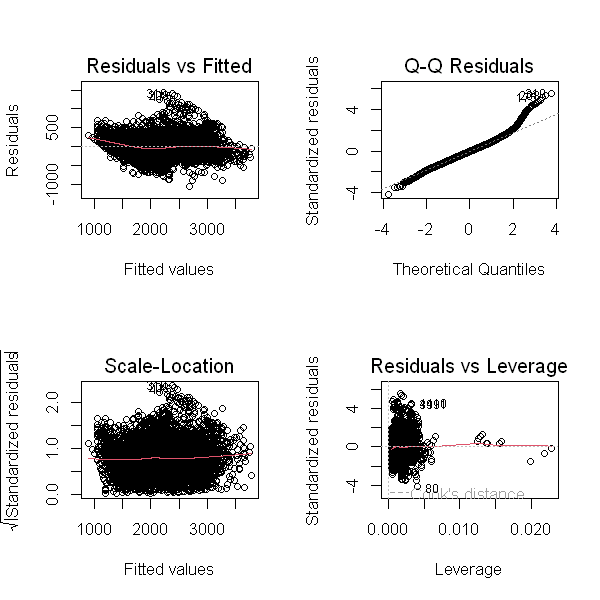

In [44]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit2$residuals) # média nula
bptest(fit2) # variância constante
bgtest(fit2) # ausência de correlação
jarque.bera.test(fit2$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit2)


In [45]:
# comparar os modelos com base no AIC (não é completamente fiável, pois os
# conjuntos de dados tem o número de elementos diferente)
AIC(fit, fit1, fit2)


Warning message in AIC.default(fit, fit1, fit2):
"models are not all fitted to the same number of observations"


,df,AIC
,<dbl>,<dbl>
fit,11,88144.33
fit1,11,87752.12
fit2,11,85780.14


In [46]:
# como pode ser observado, após a eliminação de vários outliers, ainda não conseguimos corrigir
# a heterocedasticidade, nem a normalidade dos resíduos
# vamos proceder com algumas transformações nas variáveis (podemos fazer log(y), sqrt(y), 1/y, etc)

# transformação aplicada: log da variável dependent - tem como efeito a redução da heterocedasticidade
# novo modelo

fit3 <- lm(log(price) ~ ., data = comp2)

summary(fit3)



Call:
lm(formula = log(price) ~ ., data = comp2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52470 -0.07222  0.00345  0.07486  0.49496 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.856e+00  2.636e-02 260.050   <2e-16 ***
speed           4.148e-03  7.978e-05  51.994   <2e-16 ***
hd              3.133e-04  1.231e-05  25.451   <2e-16 ***
ram             2.147e-02  4.676e-04  45.907   <2e-16 ***
screen          5.182e-02  1.749e-03  29.628   <2e-16 ***
cd  yes         4.997e-02  4.113e-03  12.151   <2e-16 ***
multi  yes      4.679e-02  4.892e-03   9.563   <2e-16 ***
premium  yes   -2.203e-01  5.360e-03 -41.102   <2e-16 ***
ads             2.846e-04  2.231e-05  12.759   <2e-16 ***
trend          -2.271e-02  2.781e-04 -81.642   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1177 on 6153 degrees of freedom
Multiple R-squared:  0.777,	Adjusted R-squared:  0.7767 
F-statist

[1] 7.438207e-19


	studentized Breusch-Pagan test

data:  fit3
BP = 482.95, df = 9, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit3
LM test = 3.6917, df = 1, p-value = 0.05468



	Jarque Bera Test

data:  fit3$residuals
X-squared = 276.63, df = 2, p-value < 2.2e-16


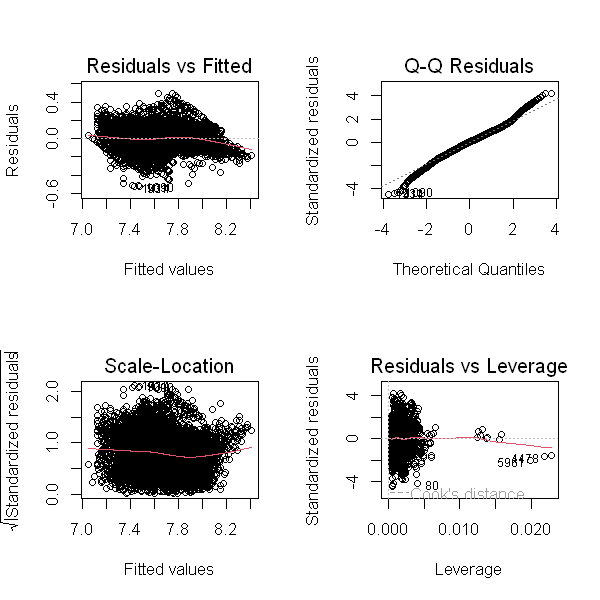

In [47]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit3$residuals) # média nula
bptest(fit3) # variância constante
bgtest(fit3) # ausência de correlação
jarque.bera.test(fit3$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit3)


In [48]:
# comparar modelo fit2 e fit3
AIC(fit2, fit3)


,df,AIC
,<dbl>,<dbl>
fit2,11,85780.143
fit3,11,-8866.498


In [49]:
# observa-se uma diferença brutal entre os valores do AIC
# portanto, o modelo com log(price) é melhor que o modelo fit2
# apesar disto não conseguimos eliminar a heterocedasticidade


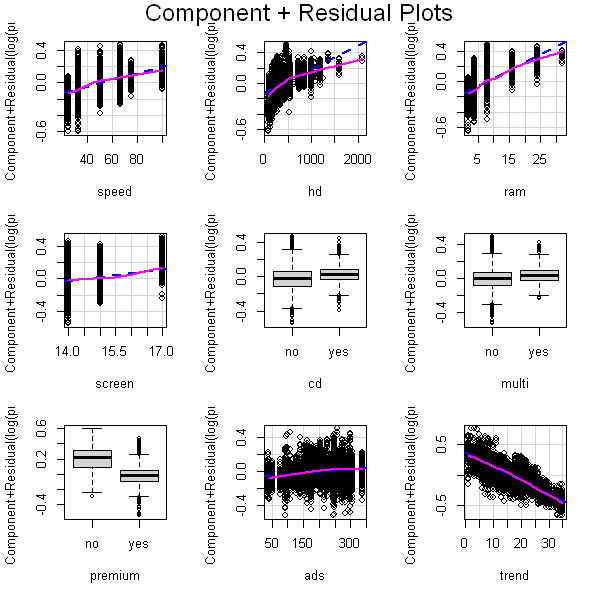

In [50]:
# vamos ver se existem não-linearidades nas variáveis/resíduos
crPlots(fit3)


In [51]:
# observa-se não-linearidade na variável hd
# corremos um novo modelo de regressão linear múltipla onde acrescentamos
# não-linearidade na variável hd (polinómio cúbico)

fit4 <- lm(log(price) ~ speed + hd + I(hd^2) + I(hd^3) + screen + ram + premium + multi + cd + ads + trend, data = comp2)

summary(fit4)

# vif(fit4)

# fit5 <- lm(log(price) ~ speed+poly(hd,3,raw=T)+screen+ram+premium+multi+cd+ads+trend, data=comp2)
# vif(fit5)



Call:
lm(formula = log(price) ~ speed + hd + I(hd^2) + I(hd^3) + screen + 
    ram + premium + multi + cd + ads + trend, data = comp2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45415 -0.06960 -0.00097  0.06880  0.44679 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.823e+00  2.506e-02 272.234   <2e-16 ***
speed           3.890e-03  7.619e-05  51.056   <2e-16 ***
hd              1.132e-03  3.582e-05  31.603   <2e-16 ***
I(hd^2)        -1.004e-06  5.136e-08 -19.541   <2e-16 ***
I(hd^3)         3.058e-10  2.209e-11  13.845   <2e-16 ***
screen          4.810e-02  1.663e-03  28.933   <2e-16 ***
ram             2.095e-02  4.487e-04  46.703   <2e-16 ***
premium  yes   -2.354e-01  5.109e-03 -46.082   <2e-16 ***
multi  yes      4.575e-02  4.640e-03   9.861   <2e-16 ***
cd  yes         4.066e-02  3.925e-03  10.359   <2e-16 ***
ads             1.833e-04  2.151e-05   8.525   <2e-16 ***
trend          -2.332e-02  2.666e-04 -87.496   <2

[1] -1.73923e-17


	studentized Breusch-Pagan test

data:  fit4
BP = 593.72, df = 11, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit4
LM test = 2.9494, df = 1, p-value = 0.08591



	Jarque Bera Test

data:  fit4$residuals
X-squared = 157.23, df = 2, p-value < 2.2e-16


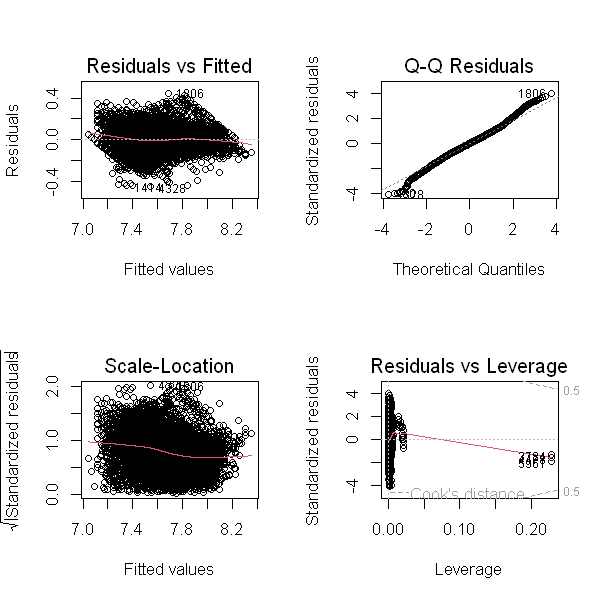

In [52]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit4$residuals) # média nula
bptest(fit4) # variância constante
bgtest(fit4) # ausência de correlação
jarque.bera.test(fit4$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit4)


In [53]:
# novo modelo com não-linearidade em hd, dada pela função hiperbólica 1/x

fit5 <- lm(log(price) ~ speed + hd + I(1 / hd) + screen + ram + premium + multi + cd + ads + trend, data = comp2)

summary(fit5)



Call:
lm(formula = log(price) ~ speed + hd + I(1/hd) + screen + ram + 
    premium + multi + cd + ads + trend, data = comp2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44104 -0.06840  0.00009  0.06952  0.46030 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.126e+00  2.689e-02 264.986   <2e-16 ***
speed           3.964e-03  7.579e-05  52.299   <2e-16 ***
hd              1.592e-04  1.298e-05  12.262   <2e-16 ***
I(1/hd)        -2.615e+01  9.729e-01 -26.877   <2e-16 ***
screen          4.750e-02  1.663e-03  28.569   <2e-16 ***
ram             2.082e-02  4.430e-04  47.003   <2e-16 ***
premium  yes   -2.314e-01  5.087e-03 -45.491   <2e-16 ***
multi  yes      4.294e-02  4.631e-03   9.273   <2e-16 ***
cd  yes         4.784e-02  3.892e-03  12.294   <2e-16 ***
ads             2.086e-04  2.129e-05   9.795   <2e-16 ***
trend          -2.320e-02  2.638e-04 -87.955   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

[1] 1.278509e-17


	studentized Breusch-Pagan test

data:  fit5
BP = 546.55, df = 10, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit5
LM test = 2.9948, df = 1, p-value = 0.08353



	Jarque Bera Test

data:  fit5$residuals
X-squared = 109.8, df = 2, p-value < 2.2e-16


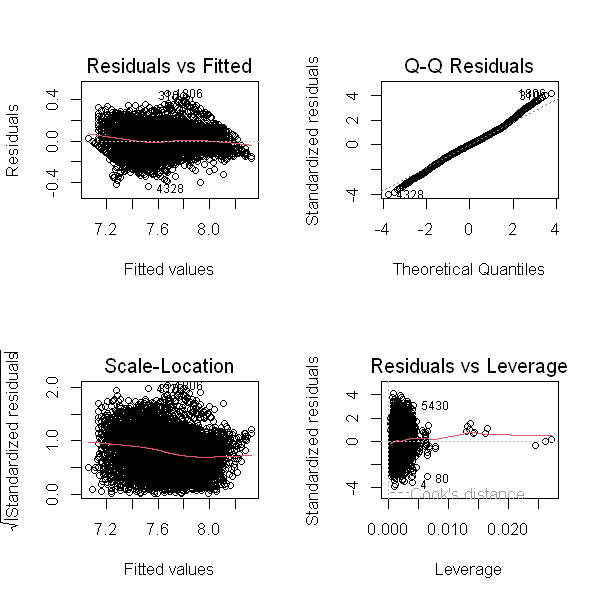

In [54]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit5$residuals) # média nula
bptest(fit5) # variância constante
bgtest(fit5) # ausência de correlação
jarque.bera.test(fit5$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit5)


In [55]:
AIC(fit3, fit4, fit5)


,df,AIC
,<dbl>,<dbl>
fit3,11,-8866.498
fit4,13,-9533.955
fit5,12,-9548.715


In [56]:
# novo modelo de regressão com não-linearidade na variável hd e interacção entre variáveis

fit6 <- lm(log(price) ~ speed * ram + hd * screen + I(1 / hd) + premium + multi + cd + ads + trend, data = comp2)

summary(fit6)



Call:
lm(formula = log(price) ~ speed * ram + hd * screen + I(1/hd) + 
    premium + multi + cd + ads + trend, data = comp2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44086 -0.06779 -0.00042  0.06622  0.46794 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.732e+00  5.430e-02 123.986  < 2e-16 ***
speed           5.675e-03  1.289e-04  44.040  < 2e-16 ***
ram             3.144e-02  7.748e-04  40.580  < 2e-16 ***
hd              7.690e-04  1.063e-04   7.237 5.13e-13 ***
screen          6.623e-02  3.526e-03  18.781  < 2e-16 ***
I(1/hd)        -1.998e+01  1.031e+00 -19.376  < 2e-16 ***
premium  yes   -2.365e-01  4.977e-03 -47.527  < 2e-16 ***
multi  yes      4.278e-02  4.523e-03   9.458  < 2e-16 ***
cd  yes         5.088e-02  3.804e-03  13.375  < 2e-16 ***
ads             1.902e-04  2.090e-05   9.103  < 2e-16 ***
trend          -2.300e-02  2.582e-04 -89.077  < 2e-16 ***
speed:ram      -1.882e-04  1.163e-05 -16.176  < 2e-16 ***
h

[1] -1.304401e-18


	studentized Breusch-Pagan test

data:  fit6
BP = 557.53, df = 12, p-value < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit6
LM test = 5.0098, df = 1, p-value = 0.0252



	Jarque Bera Test

data:  fit6$residuals
X-squared = 137.99, df = 2, p-value < 2.2e-16


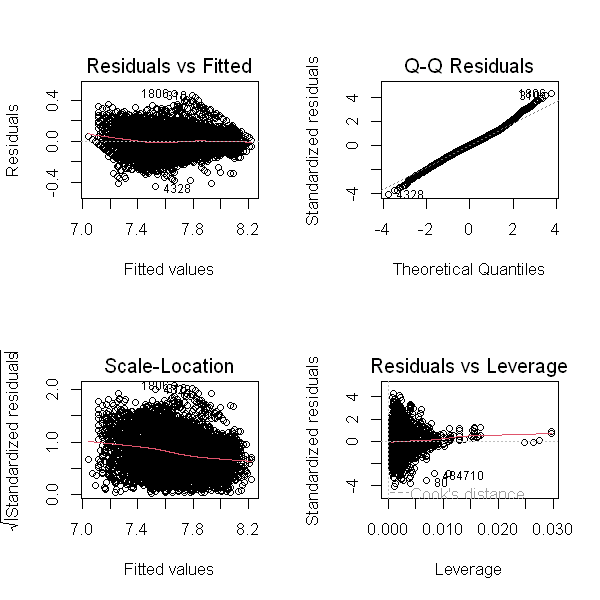

In [57]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit6$residuals) # média nula
bptest(fit6) # variância constante
bgtest(fit6) # ausência de correlação
jarque.bera.test(fit6$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit6)


In [58]:
AIC(fit3, fit4, fit5, fit6)


,df,AIC
,<dbl>,<dbl>
fit3,11,-8866.498
fit4,13,-9533.955
fit5,12,-9548.715
fit6,14,-9849.686


In [59]:
# observa-se que estamos a melhorar o modelo de regressão, mas os resíduos contínuam não ter
# variância constante e nem distribuição normal


In [60]:
# vamos fazer um teste de outlier para o modelo "fit6"
outlierTest(fit6, data = comp2)


No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
      rstudent unadjusted p-value Bonferroni p
 1806 4.313352         1.6331e-05      0.10065

In [61]:
comp[1806, ]


,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
1806,3395,33,452,8,14,no,no,yes,259,11


In [62]:
# o outlier não parece ser influenciador, portanto não vamos eliminar da base de dados


## Método de estimação dos mínimos quadrados com pesos (WLS)

In [63]:
# vamos tentar estabilizar a variância usando técnicas diferentes, nomeadamente
# vamos estimar os parâmetros com o método dos mínimos quadrados ponderados (com pesos) (weighted LS)


In [64]:
# definimos os pesos - termo que vai dividir os dois lados da equação

N <- length(comp2$price) ### pesos

# peso = 1/((1:N)^2)
# modelo de regressão - para adicionar os pesos, temos de usar a opção "weights=..."

fit7 <- lm(log(price) ~ speed * ram + hd * screen + I(1 / hd) + premium + multi + cd + ads + trend, data = comp2, weights = 1 / ((1:N)^0.5))
summary(fit7)



Call:
lm(formula = log(price) ~ speed * ram + hd * screen + I(1/hd) + 
    premium + multi + cd + ads + trend, data = comp2, weights = 1/((1:N)^0.5))

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.247764 -0.009980 -0.000024  0.009859  0.113201 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.717e+00  5.757e-02 116.673  < 2e-16 ***
speed           6.411e-03  1.460e-04  43.912  < 2e-16 ***
ram             3.022e-02  8.794e-04  34.369  < 2e-16 ***
hd              8.374e-04  1.295e-04   6.466 1.08e-10 ***
screen          6.376e-02  3.768e-03  16.920  < 2e-16 ***
I(1/hd)        -2.418e+01  9.698e-01 -24.934  < 2e-16 ***
premium  yes   -2.059e-01  5.478e-03 -37.580  < 2e-16 ***
multi  yes      4.772e-02  5.685e-03   8.394  < 2e-16 ***
cd  yes         3.980e-02  4.182e-03   9.517  < 2e-16 ***
ads             2.572e-04  1.954e-05  13.165  < 2e-16 ***
trend          -2.361e-02  2.771e-04 -85.196  < 2e-16 ***
speed:ram      

[1] 0.0008454967


	studentized Breusch-Pagan test

data:  fit7
BP = 56.042, df = 12, p-value = 1.176e-07



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit7
LM test = 5.0098, df = 1, p-value = 0.0252



	Jarque Bera Test

data:  fit7$residuals
X-squared = 101.4, df = 2, p-value < 2.2e-16


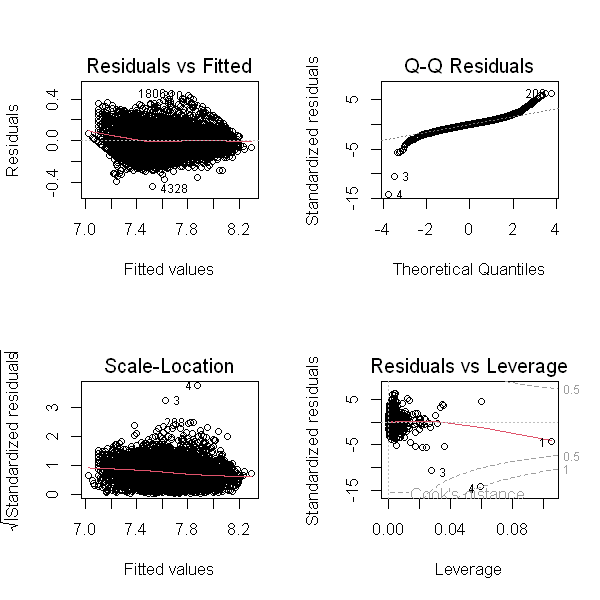

In [65]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit7$residuals) # média nula
bptest(fit7) # variância constante
bgtest(fit7) # ausência de correlação
jarque.bera.test(fit7$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit7)


In [66]:
AIC(fit6, fit7)


,df,AIC
,<dbl>,<dbl>
fit6,14,-9849.686
fit7,14,-8179.521


In [67]:
# definir pesos com base nos valores preditos /ajustados
# pesos 2
yhat <- predict(fit2, data = comp2)
w <- 1 / sqrt(yhat)

fit8 <- lm(log(price) ~ speed * ram + hd * screen + I(1 / hd) + premium + multi + cd + ads + trend, data = comp2, weights = w)
summary(fit8)



Call:
lm(formula = log(price) ~ speed * ram + hd * screen + I(1/hd) + 
    premium + multi + cd + ads + trend, data = comp2, weights = w)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.067410 -0.009873 -0.000063  0.009697  0.069131 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.711e+00  5.654e-02 118.690  < 2e-16 ***
speed           5.697e-03  1.314e-04  43.368  < 2e-16 ***
ram             3.233e-02  8.191e-04  39.464  < 2e-16 ***
hd              7.820e-04  1.124e-04   6.956 3.87e-12 ***
screen          6.663e-02  3.682e-03  18.094  < 2e-16 ***
I(1/hd)        -1.865e+01  1.038e+00 -17.970  < 2e-16 ***
premium  yes   -2.321e-01  5.106e-03 -45.460  < 2e-16 ***
multi  yes      4.279e-02  4.635e-03   9.231  < 2e-16 ***
cd  yes         5.169e-02  3.869e-03  13.358  < 2e-16 ***
ads             1.896e-04  2.138e-05   8.870  < 2e-16 ***
trend          -2.266e-02  2.585e-04 -87.628  < 2e-16 ***
speed:ram      -1.942e-04  

[1] -7.163632e-05


	studentized Breusch-Pagan test

data:  fit8
BP = 45.915, df = 12, p-value = 7.175e-06



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit8
LM test = 5.0098, df = 1, p-value = 0.0252



	Jarque Bera Test

data:  fit8$residuals
X-squared = 147.21, df = 2, p-value < 2.2e-16


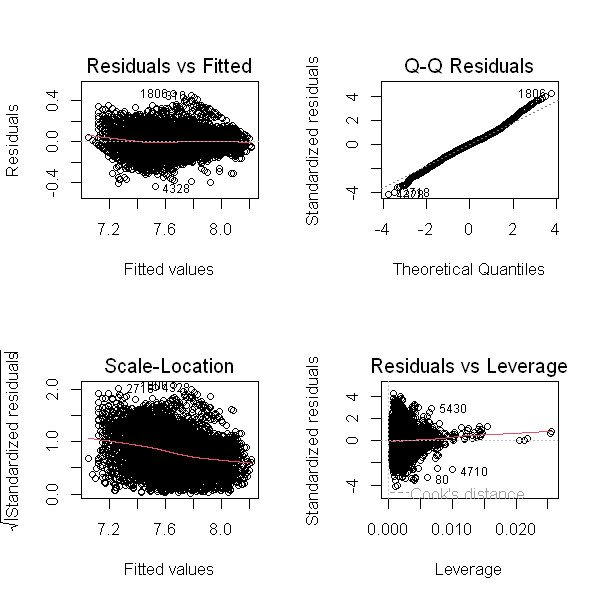

In [68]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit8$residuals) # média nula
bptest(fit8) # variância constante
bgtest(fit8) # ausência de correlação
jarque.bera.test(fit8$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit8)


In [69]:
AIC(fit6, fit7, fit8)


,df,AIC
,<dbl>,<dbl>
fit6,14,-9849.686
fit7,14,-8179.521
fit8,14,-9609.214


In [70]:
# definir pesos com base nos valores preditos /ajustados
# pesos 3

yhat <- predict(fit2, data = comp2)
w1 <- 1 / sqrt(yhat)

# definir uma regressão robusta com a função "rlm" da biblioteca MASS (e com pesos)

fit9 <- rlm(log(price) ~ speed * ram + hd * screen + I(1 / hd) + premium + multi + cd + ads + trend, data = comp2, weights = w1)
summary(fit9)



Call: rlm(formula = log(price) ~ speed * ram + hd * screen + I(1/hd) + 
    premium + multi + cd + ads + trend, data = comp2, weights = w1)
Residuals:
       Min         1Q     Median         3Q        Max 
-0.0675312 -0.0097383  0.0000399  0.0095638  0.0688559 

Coefficients:
               Value    Std. Error t value 
(Intercept)      6.8091   0.0538   126.4597
speed            0.0056   0.0001    44.5590
ram              0.0318   0.0008    40.7567
hd               0.0006   0.0001     5.6138
screen           0.0594   0.0035    16.9292
I(1/hd)        -17.1656   0.9881   -17.3717
premium  yes    -0.2357   0.0049   -48.4768
multi  yes       0.0378   0.0044     8.5585
cd  yes          0.0510   0.0037    13.8306
ads              0.0002   0.0000    11.1454
trend           -0.0228   0.0002   -92.5368
speed:ram       -0.0002   0.0000   -15.5995
hd:screen        0.0000   0.0000    -3.8500

Residual standard error: 0.01432 on 6150 degrees of freedom

[1] 4.681872e-05


	studentized Breusch-Pagan test

data:  fit9
BP = 45.915, df = 12, p-value = 7.175e-06



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit9
LM test = 5.0098, df = 1, p-value = 0.0252



	Jarque Bera Test

data:  fit9$residuals
X-squared = 187.54, df = 2, p-value < 2.2e-16


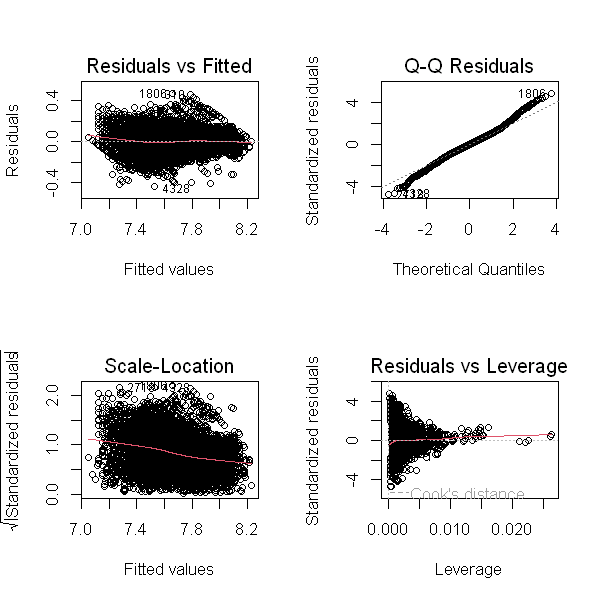

In [71]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit9$residuals) # média nula
bptest(fit9) # variância constante
bgtest(fit9) # ausência de correlação
jarque.bera.test(fit9$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit9)


In [72]:
AIC(fit6, fit7, fit8, fit9)


,df,AIC
,<dbl>,<dbl>
fit6,14,-9849.686
fit7,14,-8179.521
fit8,14,-9609.214
fit9,14,-9589.593


In [73]:
# pesos 4

h <- sqrt(fit2$residuals^2)
# h<-(fit6$residuals^2)

fit10 <- lm(log(price) ~ speed * ram + hd * screen + I(1 / hd) + premium + multi + cd + ads + trend, data = comp2, weights = 1 / h)
summary(fit10)



Call:
lm(formula = log(price) ~ speed * ram + hd * screen + I(1/hd) + 
    premium + multi + cd + ads + trend, data = comp2, weights = 1/h)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.158636 -0.006223 -0.000014  0.006698  0.069129 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     6.693e+00  2.503e-02  267.422  < 2e-16 ***
speed           6.009e-03  4.876e-05  123.241  < 2e-16 ***
ram             2.757e-02  3.635e-04   75.848  < 2e-16 ***
hd              4.725e-04  4.974e-05    9.499  < 2e-16 ***
screen          6.144e-02  1.659e-03   37.045  < 2e-16 ***
I(1/hd)        -3.098e+00  4.631e-01   -6.690 2.43e-11 ***
premium  yes   -2.716e-01  2.867e-03  -94.722  < 2e-16 ***
multi  yes      5.077e-02  2.173e-03   23.362  < 2e-16 ***
cd  yes         6.858e-02  1.861e-03   36.843  < 2e-16 ***
ads             4.491e-04  8.976e-06   50.028  < 2e-16 ***
trend          -2.697e-02  9.934e-05 -271.470  < 2e-16 ***
speed:ram    

In [74]:
AIC(fit6, fit9, fit10)


,df,AIC
,<dbl>,<dbl>
fit6,14,-9849.686
fit9,14,-9589.593
fit10,14,-11924.723


In [75]:
# pelo valor do AIC, o modelo fit10 parece o melhor até agora, mas ainda não temos
# todos os pressupostos dos resíduos verificados


[1] -0.00103356


	studentized Breusch-Pagan test

data:  fit10
BP = 1.2596, df = 12, p-value = 0.9999



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit10
LM test = 5.0098, df = 1, p-value = 0.0252



	Jarque Bera Test

data:  fit10$residuals
X-squared = 288.21, df = 2, p-value < 2.2e-16


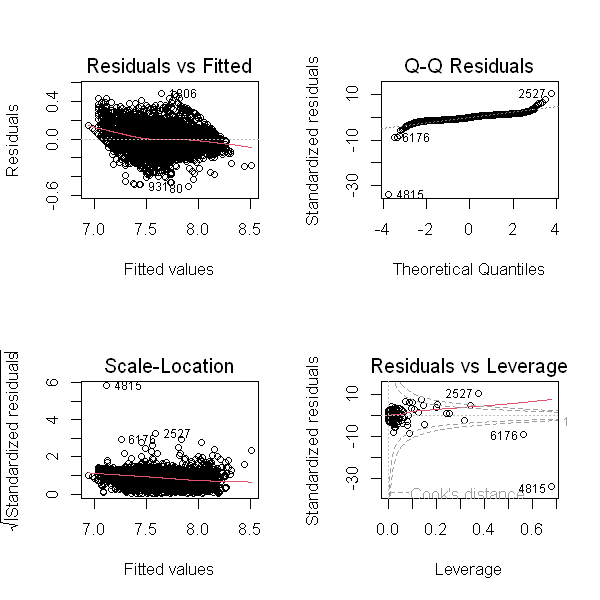

In [76]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit10$residuals) # média nula
bptest(fit10) # variância constante
bgtest(fit10) # ausência de correlação
jarque.bera.test(fit10$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit10)


In [77]:
# peso 5

resi1 <- fit2$residuals
varfunc.ols <- lm((resi1^2) ~ ., data = comp2)
varfunc1 <- (varfunc.ols$fitted.values)
fit11 <- lm(log(price) ~ speed * ram + hd * screen + I(1 / hd) + premium + multi + cd + ads + trend, data = comp2, weights = 1 / sqrt((varfunc1)))
summary(fit11)
AIC(fit11)


Warning message in sqrt((varfunc1)):
"NaNs produced"



Call:
lm(formula = log(price) ~ speed * ram + hd * screen + I(1/hd) + 
    premium + multi + cd + ads + trend, data = comp2, weights = 1/sqrt((varfunc1)))

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.057740 -0.002508  0.002036  0.005915  0.023247 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.688e+00  5.509e-02 121.399  < 2e-16 ***
speed           5.480e-03  1.246e-04  43.970  < 2e-16 ***
ram             3.343e-02  7.566e-04  44.191  < 2e-16 ***
hd              7.191e-04  1.018e-04   7.064 1.81e-12 ***
screen          6.622e-02  3.579e-03  18.501  < 2e-16 ***
I(1/hd)        -1.479e+01  1.041e+00 -14.213  < 2e-16 ***
premium  yes   -2.455e-01  6.194e-03 -39.633  < 2e-16 ***
multi  yes      4.866e-02  4.167e-03  11.677  < 2e-16 ***
cd  yes         6.534e-02  3.628e-03  18.009  < 2e-16 ***
ads             1.454e-04  2.130e-05   6.825 9.66e-12 ***
trend          -2.296e-02  2.740e-04 -83.823  < 2e-16 ***
speed:ram 

[1] -9372.942

[1] 0.03465477


	studentized Breusch-Pagan test

data:  fit11
BP = 7.486, df = 12, p-value = 0.8239



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit11
LM test = 3.6353, df = 1, p-value = 0.05656



	Jarque Bera Test

data:  fit11$residuals
X-squared = 228.64, df = 2, p-value < 2.2e-16


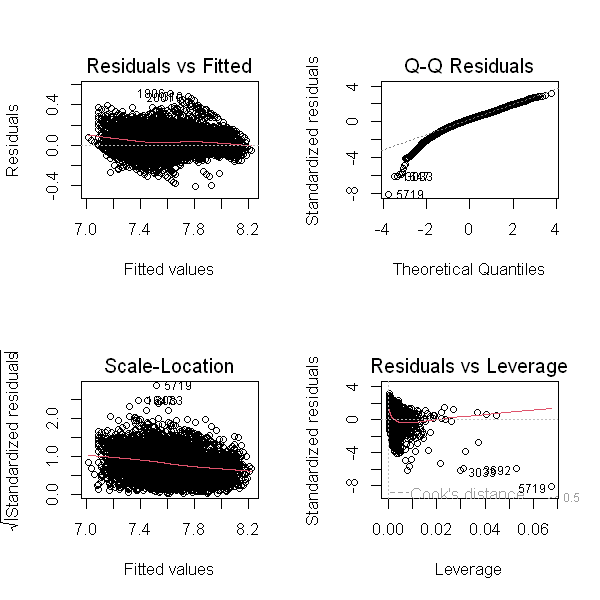

In [78]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit11$residuals) # média nula
bptest(fit11) # variância constante
bgtest(fit11) # ausência de correlação
jarque.bera.test(fit11$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit11)


In [79]:
# como todo o esforço, a variância dos resíduos contínua não-constante
# lembramos que a normalidade não é fundamental na estimação dos parâmetros, nem na previsão
# sendo a variância não-constante, os estimadores dos mínimos quadrádos continuam não-enviesados e consistentes, mas
# deixam de ser eficientes
# usando o método WLS os estimadores vão ser mais precisos
# existem outros métodos para estabilizar a variância, mas estão fora do nosso objeto de estudo (boxcox,NeweyWest,boot)
# podemos fazer algum tipo de scaling dos dados e aplicar depois os modelos de regressão


## Regressão linear múltipla sobre sub-amostras

In [80]:
# vamos definir modelos de regressão para sub-amostras
# vejamos a estrutura de dados
str(comp2)


'data.frame':	6163 obs. of  10 variables:
 $ price  : int  1499 1795 1595 1849 3295 3695 1720 1995 2575 2195 ...
 $ speed  : int  25 33 25 25 33 66 25 50 50 33 ...
 $ hd     : int  80 85 170 170 340 340 170 85 210 170 ...
 $ ram    : int  4 2 4 8 16 16 4 2 4 8 ...
 $ screen : int  14 14 15 14 14 14 14 14 15 15 ...
 $ cd     : chr  "  no  " "  no  " "  no  " "  no  " ...
 $ multi  : chr  "  no  " "  no  " "  no  " "  no  " ...
 $ premium: chr  "  yes  " "  yes  " "  yes  " "  no  " ...
 $ ads    : int  94 94 94 94 94 94 94 94 94 94 ...
 $ trend  : num  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "na.action")= 'omit' Named int [1:20] 9 19 25 29 96 101 107 116 138 148 ...
  ..- attr(*, "names")= chr [1:20] " 9" " 19" " 25" " 29" ...


In [81]:
# definir uma subamostra usando o indice das linhas/observações
comp3 <- comp2[5500:5960, ]


In [82]:
# modelo com não-linearidade em hd e interacção entre variáveis para a sub-amostra considerada

fit12 <- lm(log(price) ~ speed * ram + hd + screen + premium + multi + cd + ads, data = comp3)

summary(fit12)



Call:
lm(formula = log(price) ~ speed * ram + hd + screen + premium + 
    multi + cd + ads, data = comp3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.156464 -0.034874 -0.002459  0.032155  0.211427 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.346e+00  4.931e-02 128.701  < 2e-16 ***
speed           3.700e-03  2.976e-04  12.433  < 2e-16 ***
ram             2.793e-02  1.809e-03  15.440  < 2e-16 ***
hd              1.508e-04  2.162e-05   6.973 1.11e-11 ***
screen          4.766e-02  2.942e-03  16.201  < 2e-16 ***
premium  yes   -2.450e-01  1.509e-02 -16.240  < 2e-16 ***
multi  yes      1.844e-02  7.168e-03   2.572   0.0104 *  
cd  yes         1.027e-01  8.722e-03  11.772  < 2e-16 ***
ads             5.406e-04  1.034e-04   5.230 2.60e-07 ***
speed:ram      -1.008e-04  2.361e-05  -4.271 2.37e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06149 on 451 degrees of freedo

[1] -2.157777e-18


	studentized Breusch-Pagan test

data:  fit12
BP = 61.293, df = 9, p-value = 7.549e-10



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit12
LM test = 0.87422, df = 1, p-value = 0.3498



	Jarque Bera Test

data:  fit12$residuals
X-squared = 43.703, df = 2, p-value = 3.236e-10


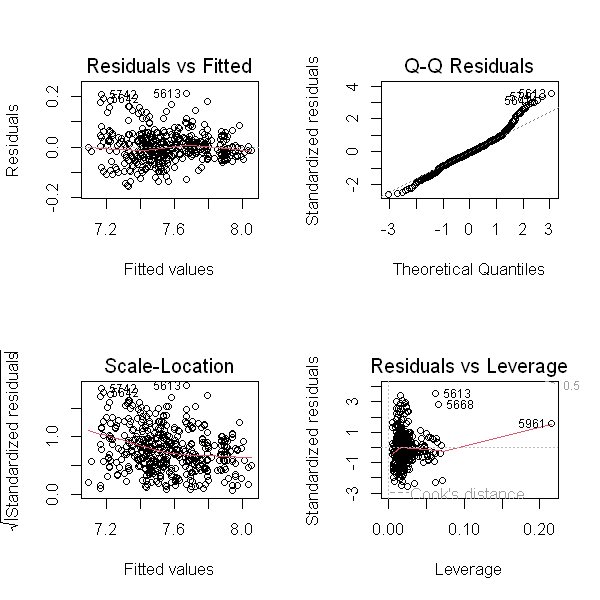

In [83]:
# verificação dos pressupostos dos resíduos (testes e gráficos)
mean(fit12$residuals) # média nula
bptest(fit12) # variância constante
bgtest(fit12) # ausência de correlação
jarque.bera.test(fit12$residuals) # distribuição normal

# representação gráfica sobre os resíduos
# definir o tamanho da figura
options(repr.plot.width = 5, repr.plot.height = 5)

par(mfrow = c(2, 2))
plot(fit12)


In [84]:
AIC(fit12)


[1] -1251.259

In [85]:
# como temos menos dados, a existância de um valor extremo (na posição 5961) está enviesar ainda mais os resultados


## Previsão e avaliação da performance

In [86]:
# vamos proseguir para previsão e avaliação da performance da previsão (erros de previsão)
# lembra-se que a presuposto de ausência de correlação nos resíduos é fundamental na qualidade da previsão


In [87]:
# vamos calcular o MAPE a previsão in-sample (sobre toda a amostra) para cada um dos
# modelos de regressão múltipla estimado


[1] 0.09698433

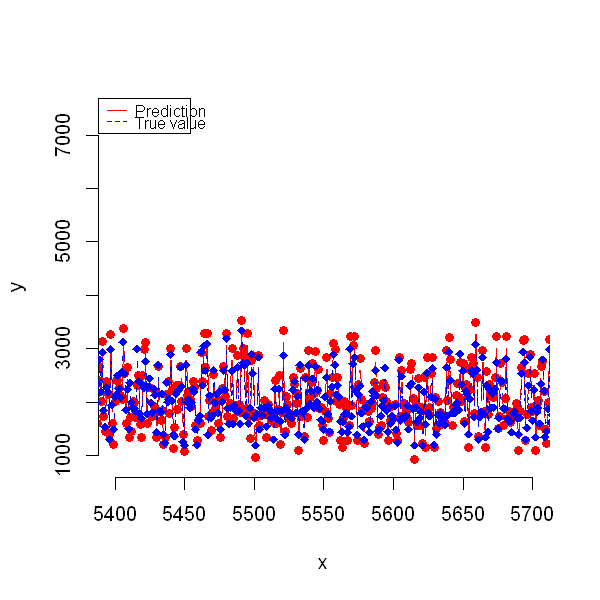

In [88]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr0 <- predict(fit, comp0)
plot((pr0), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp0$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual0 <- comp0$price
prediction0 <- (fit$fitted.values)
n <- length(comp0$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE0 <- (1 / n) * sum(abs((actual0 - prediction0) / actual0))
MAPE0


[1] 0.09648339

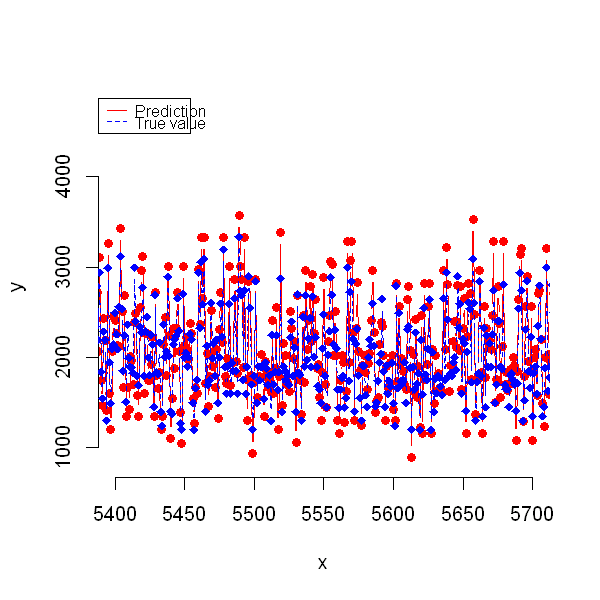

In [89]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr1 <- predict(fit1, comp1)
plot((pr1), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp1$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)
# erro de previsão

actual1 <- comp1$price
prediction1 <- (fit1$fitted.values)
n <- length(comp1$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE1 <- (1 / n) * sum(abs((actual1 - prediction1) / actual1))
MAPE1


[1] 0.09289718

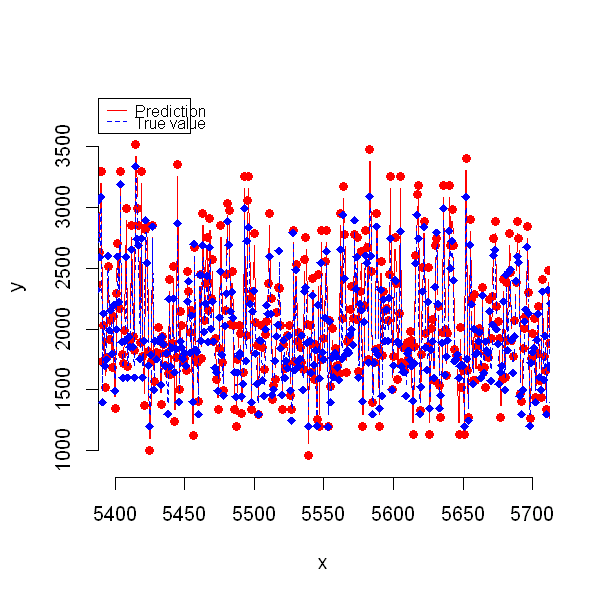

In [90]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr2 <- predict(fit2, comp2)
plot((pr2), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual2 <- comp2$price
prediction2 <- (fit2$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE2 <- (1 / n) * sum(abs((actual2 - prediction2) / actual2))
MAPE2


[1] 0.09128183

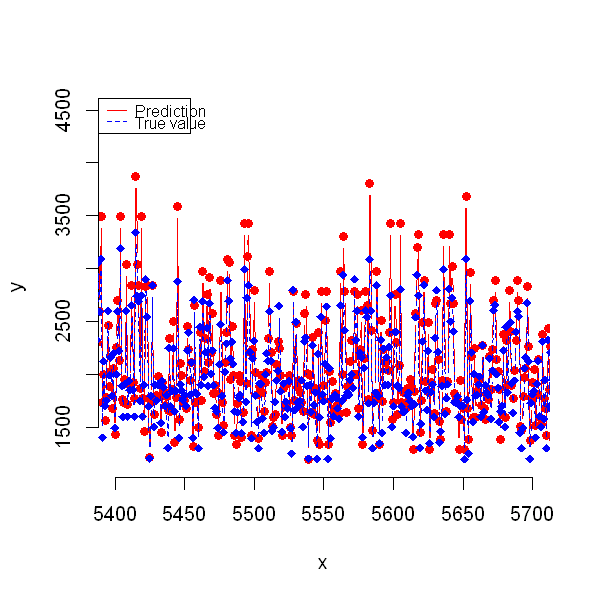

In [91]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr3 <- predict(fit3, comp2)
plot(exp(pr3), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual3 <- comp2$price
prediction3 <- exp(fit3$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE3 <- (1 / n) * sum(abs((actual3 - prediction3) / actual3))
MAPE3


[1] 0.08618679

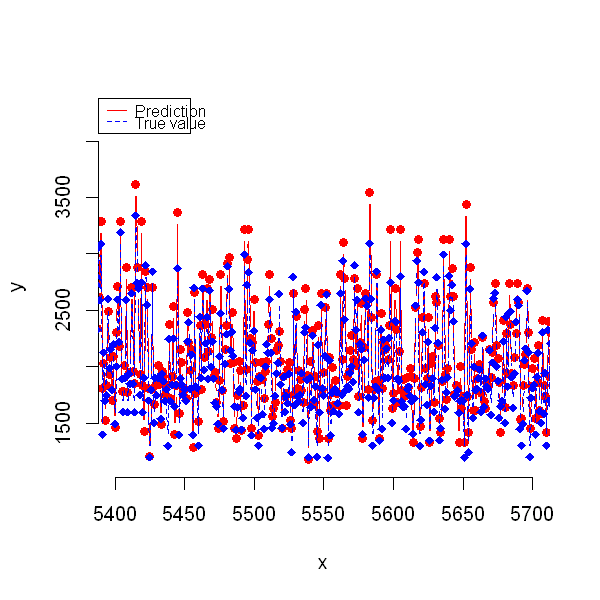

In [92]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr4 <- predict(fit4, comp2)
plot(exp(pr4), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual4 <- comp2$price
prediction4 <- exp(fit4$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE4 <- (1 / n) * sum(abs((actual4 - prediction4) / actual4))
MAPE4


[1] 0.08634425

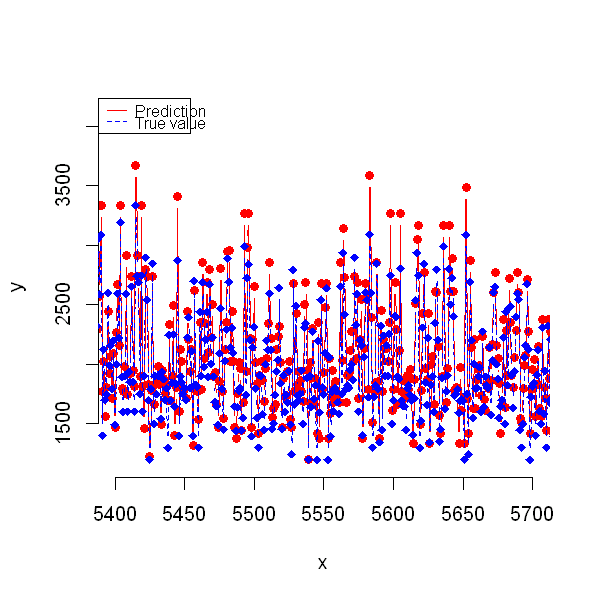

In [93]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr5 <- predict(fit5, comp2)
plot(exp(pr5), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual5 <- comp2$price
prediction5 <- exp(fit5$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE5 <- (1 / n) * sum(abs((actual5 - prediction5) / actual5))
MAPE5


[1] 0.08413117

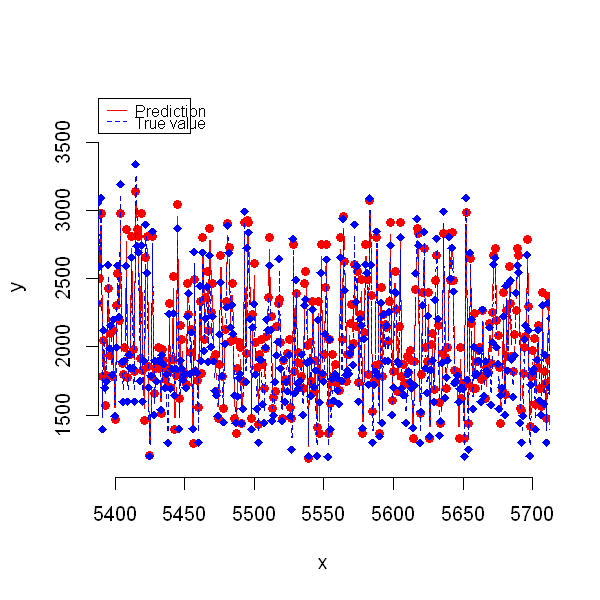

In [94]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr6 <- predict(fit6, comp2)
plot(exp(pr6), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual6 <- comp2$price
prediction6 <- exp(fit6$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE6 <- (1 / n) * sum(abs((actual6 - prediction6) / actual6))
MAPE6


[1] 0.08583683

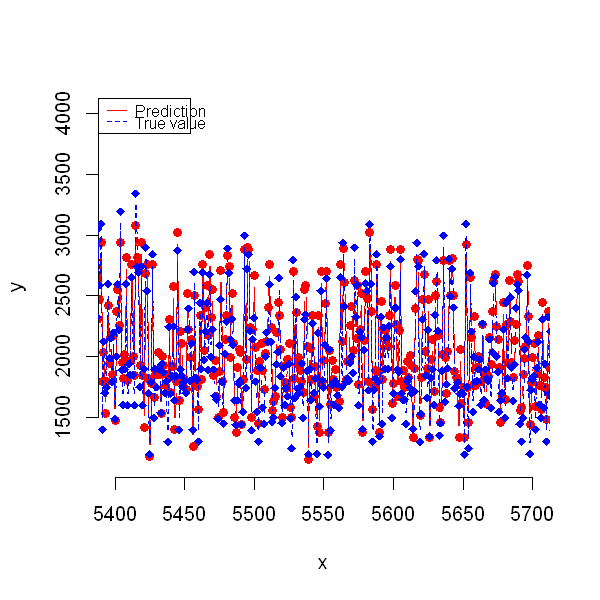

In [95]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr7 <- predict(fit7, comp2)
plot(exp(pr7), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual7 <- comp2$price
prediction7 <- exp(fit7$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE7 <- (1 / n) * sum(abs((actual7 - prediction7) / actual7))
MAPE7


[1] 0.08417568

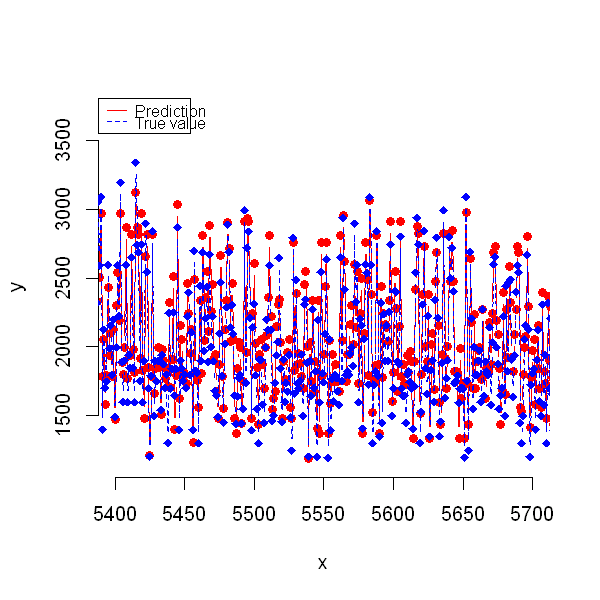

In [96]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr8 <- predict(fit8, comp2)
plot(exp(pr8), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual8 <- comp2$price
prediction8 <- exp(fit8$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE8 <- (1 / n) * sum(abs((actual8 - prediction8) / actual8))
MAPE8


[1] 0.08392434

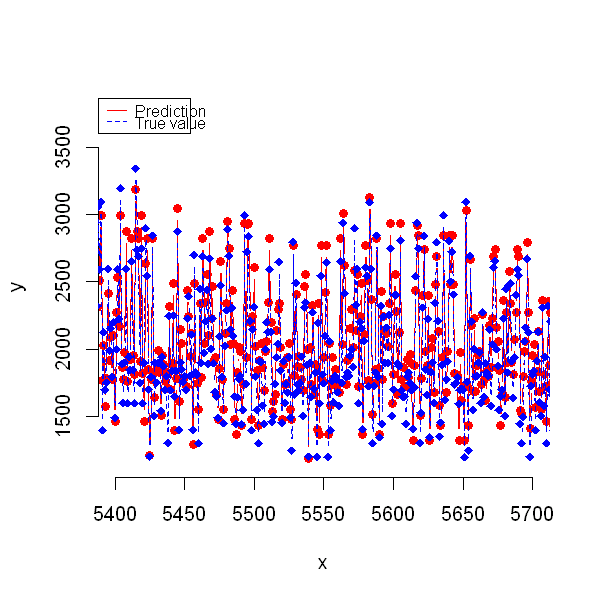

In [97]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr9 <- predict(fit9, comp2)
plot(exp(pr9), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual9 <- comp2$price
prediction9 <- exp(fit9$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE9 <- (1 / n) * sum(abs((actual9 - prediction9) / actual9))
MAPE9


[1] 0.08950029

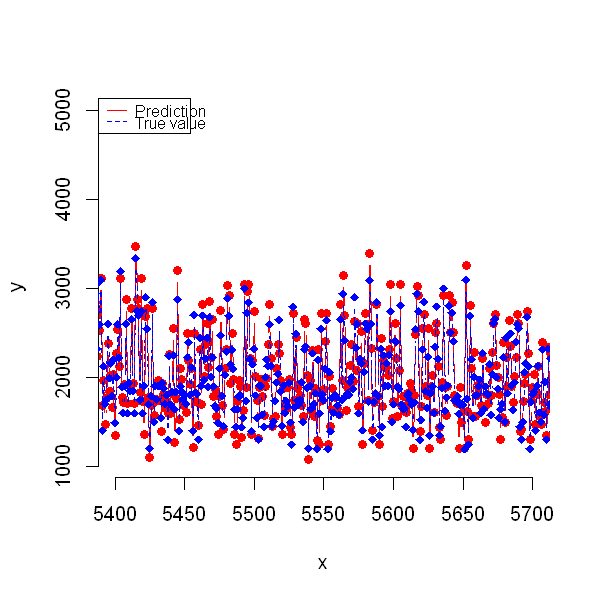

In [98]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr10 <- predict(fit10, comp2)
plot(exp(pr10), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual10 <- comp2$price
prediction10 <- exp(fit10$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE10 <- (1 / n) * sum(abs((actual10 - prediction10) / actual10))
MAPE10


Warning message in actual11 - prediction11:
"longer object length is not a multiple of shorter object length"


[1] 0.2548766

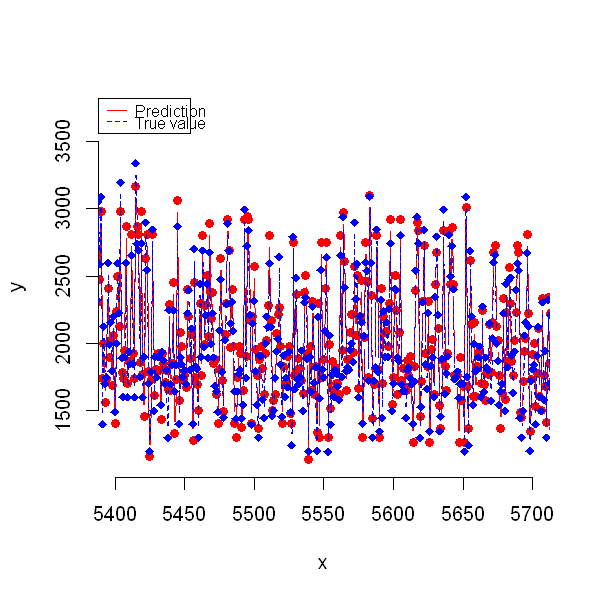

In [99]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr11 <- predict(fit11, comp2)
plot(exp(pr11), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(5400, 5700))

lines(comp2$price, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(5400, 5700))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual11 <- comp2$price
prediction11 <- exp(fit11$fitted.values)
n <- length(comp2$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE11 <- (1 / n) * sum(abs((actual11 - prediction11) / actual11))
MAPE11


[1] 0.04517172

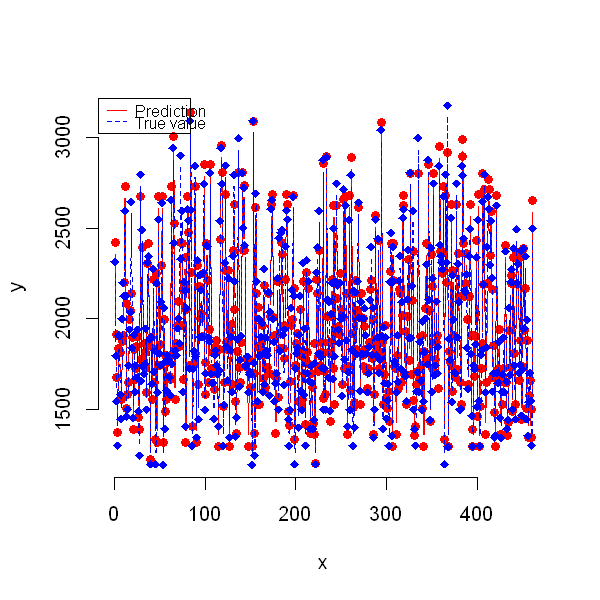

In [100]:
# gráfico comparativo entre o valor verdadeiro e o valor predito e MAPE
pr12 <- predict(fit12, comp3)
plot(exp(pr12), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y")

lines(comp3$price, pch = 18, col = "blue", type = "b", lty = 2)

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual12 <- comp3$price
prediction12 <- exp(fit12$fitted.values)
n <- length(comp3$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE12 <- (1 / n) * sum(abs((actual12 - prediction12) / actual12))
MAPE12


In [101]:
# cbind(exp(pr12),exp(fit12$fitted.values))


## Resumo dos resultados

In [102]:
# vamos fazer um resumo dos resultados obtidos, comparando MAPE, AIC e R^2


In [103]:
erros <- c(MAPE0, MAPE1, MAPE2, MAPE3, MAPE4, MAPE5, MAPE6, MAPE7, MAPE8, MAPE9, MAPE10, MAPE11, MAPE12)
AICs <- c(AIC(fit), AIC(fit1), AIC(fit2), AIC(fit3), AIC(fit4), AIC(fit5), AIC(fit6), AIC(fit7), AIC(fit8), AIC(fit9), AIC(fit10), AIC(fit11), AIC(fit12))
R_quadrado <- c(summary(fit)$r.squared, summary(fit1)$r.squared, summary(fit2)$r.squared, summary(fit3)$r.squared, summary(fit4)$r.squared, summary(fit5)$r.squared, summary(fit6)$r.squared, summary(fit7)$r.squared, summary(fit8)$r.squared, summary(fit9)$r.squared, summary(fit10)$r.squared, summary(fit11)$r.squared, summary(fit12)$r.squared)
cbind(erros, AICs, R_quadrado)


erros,AICs,R_quadrado
0.09698433,88144.332,0.7632563
0.09648339,87752.124,0.7765382
0.09289718,85780.143,0.7804858
0.09128183,-8866.498,0.7770124
0.08618679,-9533.955,0.8000302
0.08634425,-9548.715,0.8004438
0.08413117,-9849.686,0.8100783
0.08583683,-8179.521,0.7882606
0.08417568,-9609.214,0.8050652
0.08392434,-9589.593,NA


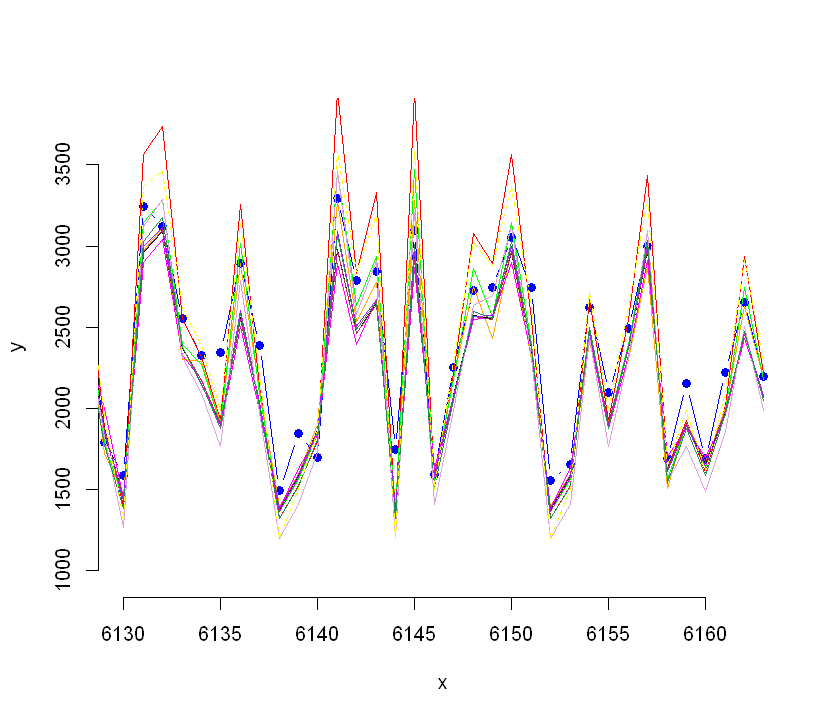

In [ ]:
# representação conjunta das previsões dos últimos 33 valores para cada modelo considerado

# definir o tamanho da figura
options(repr.plot.width = 7, repr.plot.height = 6)

plot(comp2$price, type = "b", frame = FALSE, pch = 19, col = "blue", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(exp(pr3), pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(exp(pr4), pch = 19, col = "orange", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(exp(pr5), pch = 19, col = "green", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(exp(pr6), pch = 19, col = "black", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(exp(pr7), pch = 19, col = "magenta", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(exp(pr8), pch = 19, col = "maroon", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(exp(pr9), pch = 19, col = "purple", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(exp(pr10), pch = 19, col = "plum", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(exp(pr11), pch = 19, col = "seagreen", xlab = "x", ylab = "y", xlim = c(6130, 6163))
lines(pr2, pch = 18, col = "yellow", lty = 2, xlim = c(6130, 6163))


## Conjunto de treino e conjunto de teste

In [105]:
# para poder realmente entender se o modelo de regressão definido tem poder preditivo fora de amostra
# isto é out-of-sample, vamos dividir a amostra em dois conjuntos: conjunto de treino (90% dos dados)
# e conjunto de teste (10% dos dados)
# vamos treinar a regressão sobre o conjunto de treino
# o modelo de regressão não "conhece" os valores do conjunto de teste
# vamos prever k valores out-of-sample (sendo k o número de elementos do conjunto de teste) usando o modelo
# de regressão treinado sobre o conjunto de treino
# os valores preditos são depois comparados com os valores verdadeiros do conjunto de teste, calculando o MAPE
# o valor de MAPE vai ilustrar a verdadeira capacidade de generalização/previsão out-of-sample do modelo de regressão


In [106]:
# install.packages("caTools")


In [107]:
library(caTools)


Warning message:
"package 'caTools' was built under R version 4.3.3"


In [108]:
# usamos a biblioteca "caTools" para fazer o split (divisão) da amostra em conjunto de treino e teste

separar <- sample.split(comp2, SplitRatio = 0.90)

train <- comp2[separar, ]

test <- comp2[!(separar), ]


In [109]:
# verificar o número de observações de cada conjunto
nrow(train)
nrow(test)


[1] 5547

[1] 616

In [110]:
# correr o modelo fit8 com os pesos do modelo fit6 (usando WLS) sobre o conjunto de treino

fit2_n <- lm(price ~ ., data = train)
yhat <- predict(fit2_n, data = train)
w <- 1 / sqrt(yhat)
fit8_n <- lm(log(price) ~ speed * ram + hd * screen + I(1 / hd) + premium + multi + cd + ads + trend, data = train, weights = w)


[1] 0.08864359

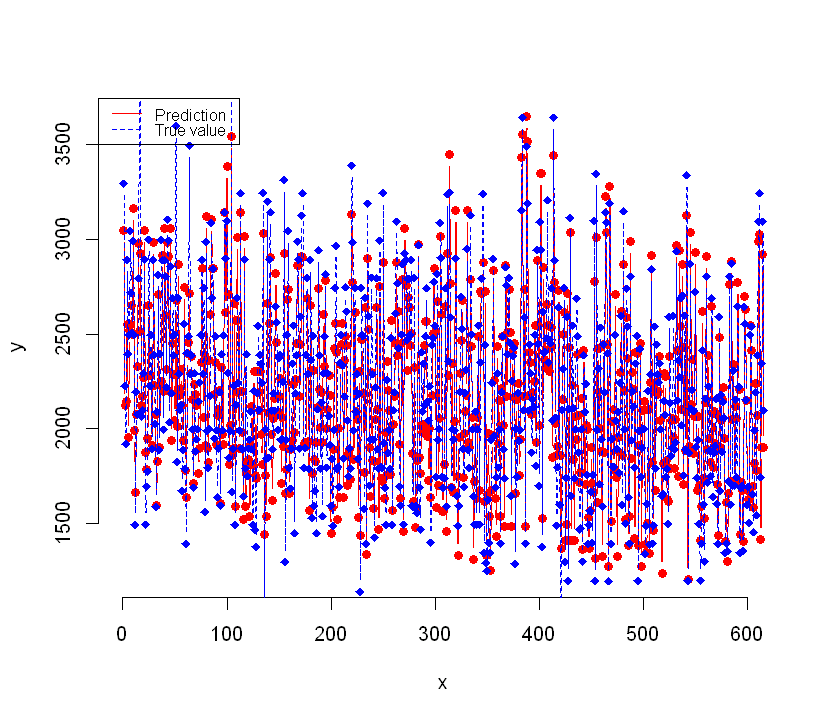

In [111]:
# previsão usando o modelo fit8_n sobre o conjunto de teste

pr8_n <- predict(fit8_n, test)
plot(exp(pr8_n), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y")

lines(test$price, pch = 18, col = "blue", type = "b", lty = 2)

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)

# erro de previsão

actual8_n <- test$price
# prediction<-exp(pr)
prediction8_n <- exp(pr8_n)
n <- length(test$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE8_n <- (1 / n) * sum(abs((actual8_n - prediction8_n) / actual8_n))
MAPE8_n


In [112]:
# a mesma coisa usando o modelo fit2
# agora, a regressão fit2 sobre o conjunto de treino, recebe o nome de fit2_n


In [113]:
fit2_n <- lm(price ~ ., data = train)


[1] 0.09752778

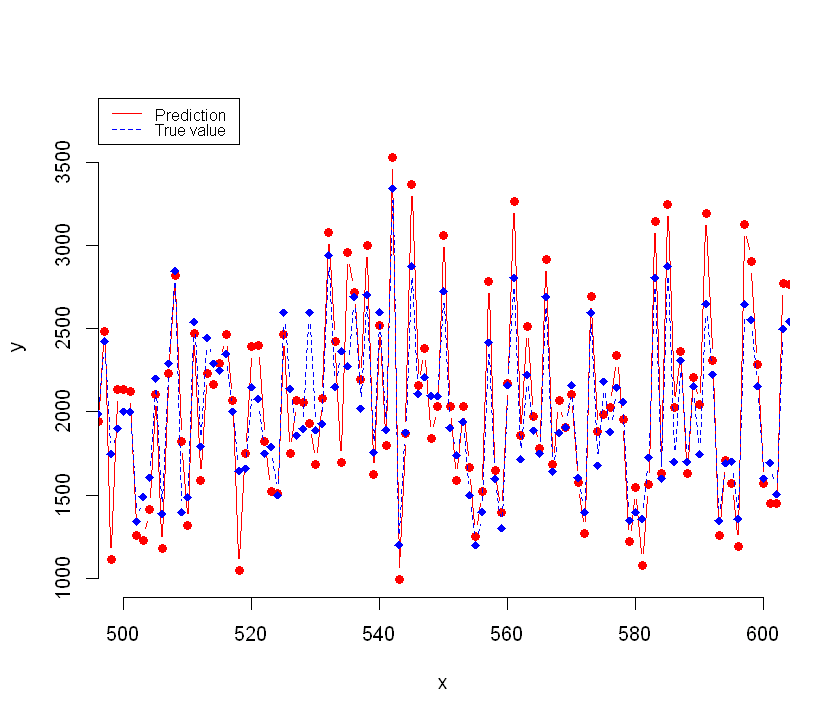

In [114]:
# previsão usando o modelo fit2_n sobre o conjunto de teste
pr2_n <- predict(fit2_n, test)
plot((pr2_n), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(500, 600))

lines(test$price, pch = 18, col = "blue", type = "b", lty = 2, , xlim = c(500, 600))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)
# erro de previsão
# calcular vários erros de previsão

actual2_n <- test$price
# prediction<-exp(pr)
prediction2_n <- (pr2_n)
n <- length(test$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE2_n <- (1 / n) * sum(abs((actual2_n - prediction2_n) / actual2_n))
MAPE2_n


In [115]:
# Fazer a partição da amostra em conjunto de treino e conjunto de teste
# a partição é aleatória (usamos "sample") e 90% dos dados definem o conjunto de treino
index <- sample(1:nrow(comp2), round(0.90 * nrow(comp2)))

# conjunto de treino
train_data <- as.data.frame(comp2[index, ])

# conjunto de teste
test_data <- as.data.frame(comp2[-index, ])


In [116]:
nrow(train_data)
nrow(test_data)


[1] 5547

[1] 616

In [117]:
fit2_n1 <- lm(price ~ ., data = train_data)


[1] 0.09868688

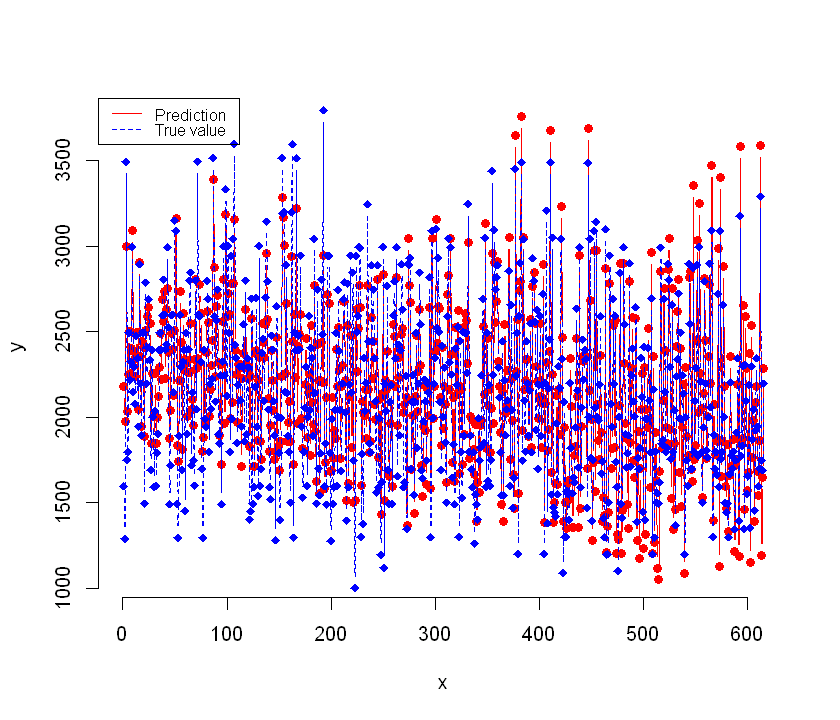

In [118]:
# # previsão usando o modelo fit2_n1 sobre o conjunto de teste
pr2_n1 <- predict(fit2_n1, test_data)
plot((pr2_n1), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y")

lines(test_data$price, pch = 18, col = "blue", type = "b", lty = 2)

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)
# erro de previsão

actual2_n1 <- test_data$price
# prediction<-exp(pr)
prediction2_n1 <- (pr2_n1)
n <- length(test_data$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE2_n1 <- (1 / n) * sum(abs((actual2_n1 - prediction2_n1) / actual2_n1))
MAPE2_n1


In [119]:
# fazer a partição usando o índice de posição das linhas/observações no data-frame

train1 <- comp2[1:6000, ]
test1 <- comp2[6001:6163, ]


In [120]:
fit2_n11 <- lm(price ~ ., data = train1)


[1] 0.09132504

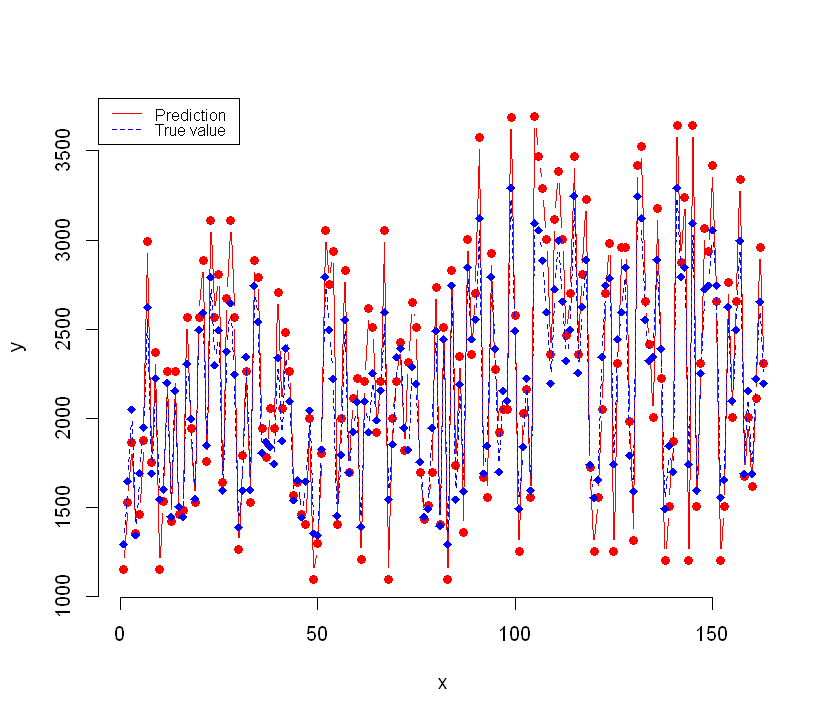

In [121]:
# previsão usando o modelo fit2_n11 sobre o conjunto de teste
pr2_n11 <- predict(fit2_n11, test1)
plot((pr2_n11), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y")

lines(test1$price, pch = 18, col = "blue", type = "b", lty = 2)

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)
# erro de previsão
# calcular vários erros de previsão

actual2_n11 <- test1$price
# prediction<-exp(pr)
prediction2_n11 <- (pr2_n11)
n <- length(test1$price)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE2_n11 <- (1 / n) * sum(abs((actual2_n11 - prediction2_n11) / actual2_n11))
MAPE2_n11


In [122]:
# Concluí-se que os modelos tem uma boa capacidade de previsão in-sample e out-of-sample
# pois obtivemos valores de MAPE entre 4% e 10%
# como os erros in-sample e out-of-sample são muito semelhantes denota que não temos nem
# overfitting, nem underfitting
